<a href="https://colab.research.google.com/github/lmbaezp/alura_store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

print(type(tienda1))
tienda1.head()

<class 'pandas.core.frame.DataFrame'>


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [34]:
tienda1.describe()

,Precio,Costo de envío,Calificación,Cantidad de cuotas,lat,lon
count,2.359000e+03,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,4.878679e+05,26018.609580,3.976685,2.943196,5.365283,-74.789417
std,6.146868e+05,32860.001783,1.415370,2.819897,2.287445,1.217827
min,7.600000e+03,0.000000,1.000000,1.000000,-4.215280,-77.281110
25%,5.575000e+04,3100.000000,3.000000,1.000000,4.609710,-75.563590
50%,2.353000e+05,12400.000000,5.000000,1.000000,4.609710,-74.199040
75%,6.781000e+05,36000.000000,5.000000,4.000000,6.251840,-74.081750
max,2.977000e+06,160800.000000,5.000000,24.000000,11.544440,-67.923900


In [35]:
tienda1.Precio

,Precio
0,164300.0
1,192300.0
2,209600.0
3,757500.0
4,335200.0
...,...
2354,1284400.0
2355,282800.0
2356,122900.0
2357,691300.0


In [36]:
tienda1["Calificación"].describe()

,Calificación
count,2359.000000
mean,3.976685
std,1.415370
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


#1. Análisis de facturación



In [87]:
# Agregar columna 'Tienda' con el valor de cada tienda
tienda1['Tienda'] = 1
tienda2['Tienda'] = 2
tienda3['Tienda'] = 3
tienda4['Tienda'] = 4
# Unión de todas las tablas
todas_tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4])
print('lugar de Compra')
print(todas_tiendas['Lugar de Compra'].unique())
# Convertir a datetime type
todas_tiendas['Fecha de Compra'] = pd.to_datetime(todas_tiendas['Fecha de Compra'], dayfirst=True)
tienda1['Fecha de Compra'] = pd.to_datetime(tienda1['Fecha de Compra'], dayfirst=True)
tienda2['Fecha de Compra'] = pd.to_datetime(tienda2['Fecha de Compra'], dayfirst=True)
tienda3['Fecha de Compra'] = pd.to_datetime(tienda3['Fecha de Compra'], dayfirst=True)
tienda4['Fecha de Compra'] = pd.to_datetime(tienda4['Fecha de Compra'], dayfirst=True)
# Agregar columna año
todas_tiendas['Año'] = todas_tiendas['Fecha de Compra'].dt.year
# Agregar columna Trimestre (porque las ventas del 2023 llegan hasta marzo)
todas_tiendas['Trimestre'] = todas_tiendas['Fecha de Compra'].dt.quarter
print(type(todas_tiendas))
print(todas_tiendas.head())

lugar de Compra
['Bogotá' 'Medellín' 'Cartagena' 'Cali' 'Santa Marta' 'Pereira'
 'Barranquilla' 'Villavicencio' 'Inírida' 'Cúcuta' 'Manizales' 'Neiva'
 'Bucaramanga' 'Valledupar' 'Pasto' 'Riohacha' 'Armenia' 'Leticia'
 'Soacha']
<class 'pandas.core.frame.DataFrame'>
            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      2021-01-16      Pedro Gomez          Bogotá             4   
1      2022-05-18  Beatriz Morales        Medellín             1   
2      2021-03-15   Juan Fernandez       Cartagena             1   
3      2022-05-03   Ju

In [88]:
# TIENDA 1

# Total de las ventas

total_valor_ventas_1 = sum(tienda1.Precio)
total_ventas_1 = len(tienda1.Precio)
print('Número de ventas de la tienda 1')
print(total_ventas_1)
print('Valor de las ventas de la tienda 1')
print(total_valor_ventas_1)

Número de ventas de la tienda 1
2359
Valor de las ventas de la tienda 1
1150880400.0


In [89]:
# TIENDA 2

# Total de las ventas

total_valor_ventas_2 = sum(tienda2.Precio)
total_ventas_2 = len(tienda2.Precio)
print('Número de ventas de la tienda 2')
print(total_ventas_2)
print('Valor de las ventas de la tienda 2')
print(total_valor_ventas_2)

Número de ventas de la tienda 2
2359
Valor de las ventas de la tienda 2
1116343500.0


In [90]:
# TIENDA 3

# Total de las ventas

total_valor_ventas_3 = sum(tienda3.Precio)
total_ventas_3 = len(tienda3.Precio)
print('Número de ventas de la tienda 3')
print(total_ventas_3)
print('Valor de las ventas de la tienda 3')
print(total_valor_ventas_3)

Número de ventas de la tienda 3
2359
Valor de las ventas de la tienda 3
1098019600.0


In [91]:
# TIENDA 4

# Total de las ventas
total_valor_ventas_4 = sum(tienda4.Precio)
total_ventas_4 = len(tienda4.Precio)
print('Número de ventas de la tienda 4')
print(total_ventas_4)
print('Valor de las ventas de la tienda 4')
print(total_valor_ventas_4)

Número de ventas de la tienda 4
2358
Valor de las ventas de la tienda 4
1038375700.0


   Tienda  valor_ventas  porcentaje_ventas
0       1  1.150880e+09               26.0
1       2  1.116344e+09               25.0
2       3  1.098020e+09               25.0
3       4  1.038376e+09               24.0


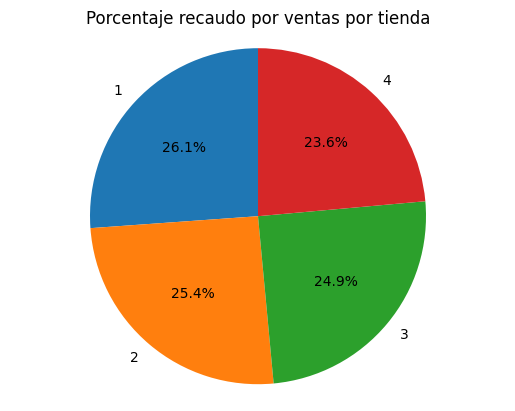

In [133]:
# TOTAL VENTAS POR TIENDA EN TABLA
valor_ventas_por_tienda = todas_tiendas.groupby(todas_tiendas['Tienda']).agg(
   valor_ventas = ('Precio', 'sum'),
).reset_index()

valor_ventas_por_tienda['porcentaje_ventas'] = round((
    valor_ventas_por_tienda['valor_ventas'] / todas_tiendas['Precio'].sum()
) * 100 , 0)

print(valor_ventas_por_tienda.head())

# Crear el gráfico circular
plt.pie(valor_ventas_por_tienda['valor_ventas'], labels=valor_ventas_por_tienda['Tienda'], autopct='%1.1f%%', startangle=90)

# Ajustar el gráfico para que sea circular
plt.axis('equal')

# Título
plt.title('Porcentaje recaudo por ventas por tienda')

# Guardar el gráfico
plt.savefig("porcentaje_ventas_por_tienda.png")

# Mostrar el gráfico
plt.show()

ventas_por_trimestre_tienda
    Trimestre  Tienda  Total_Ventas  Total_Valor_Ventas  Promedio_Valor_Ventas
0           1       1           753         374881500.0          497850.597610
1           1       2           724         334215200.0          461623.204420
2           1       3           726         304479800.0          419393.663912
3           1       4           743         318571300.0          428763.526245
4           2       1           516         252261900.0          488879.651163
5           2       2           511         255927100.0          500835.812133
6           2       3           515         248059300.0          481668.543689
7           2       4           545         240151900.0          440645.688073
8           3       1           577         304933600.0          528481.109185
9           3       2           557         260326100.0          467371.813285
10          3       3           552         249598800.0          452171.739130
11          3       4   

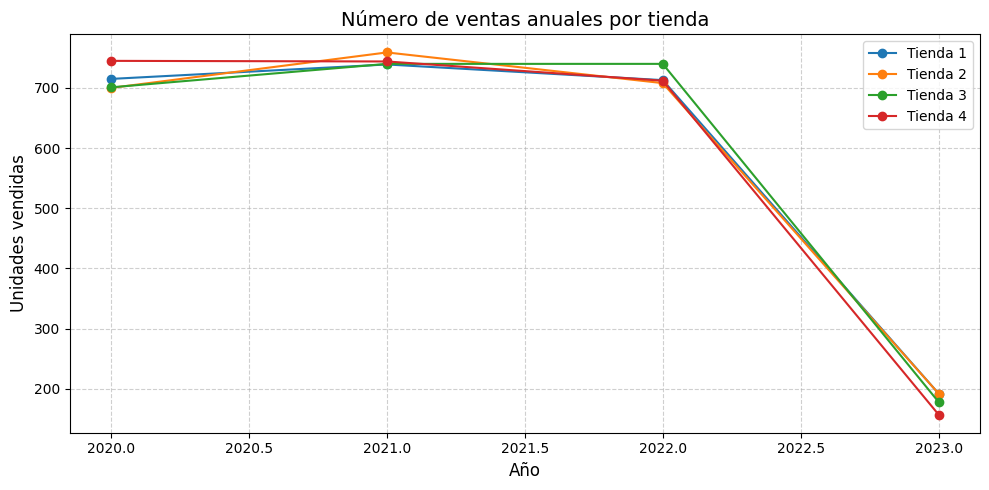

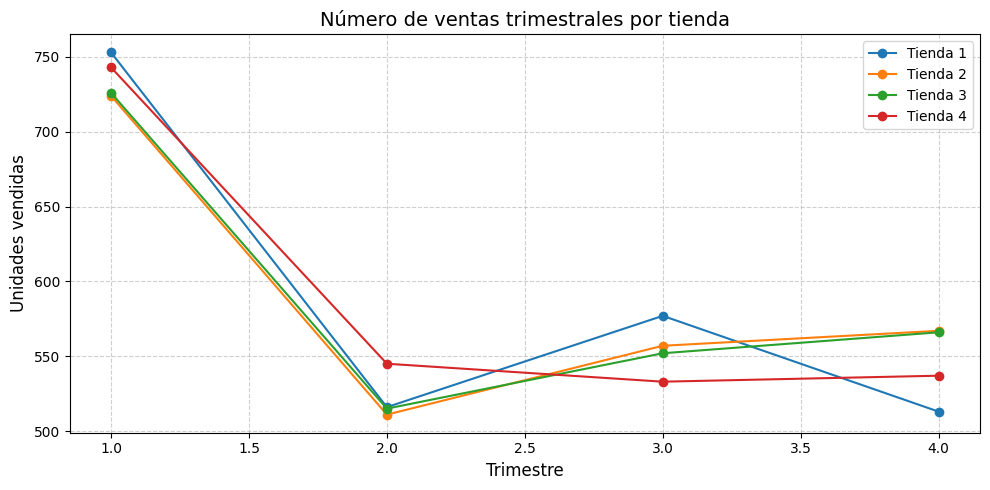

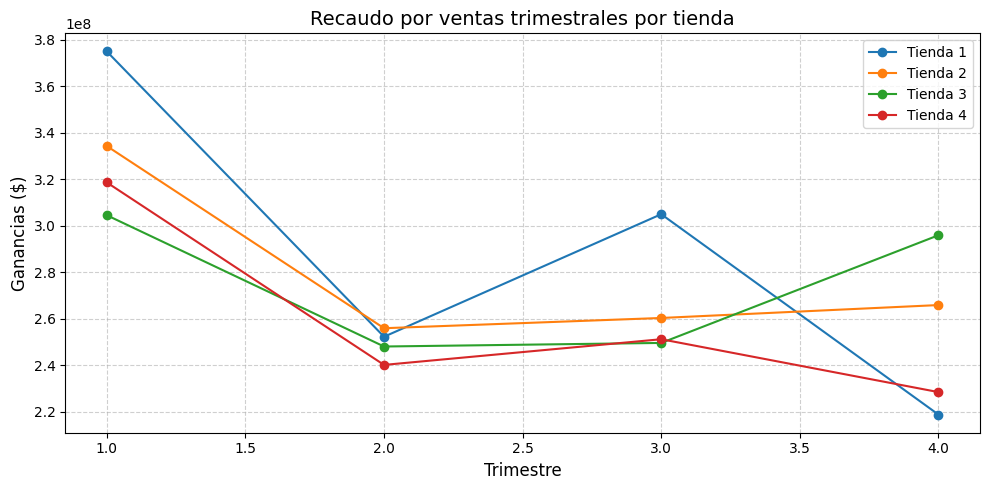

ventas_por_año_tienda_filtradas
     Año  Tienda  Total_Ventas  Total_Valor_Ventas  Promedio_Valor_Ventas
0   2020       1           715         368933200.0          515990.489510
1   2020       2           700         320466600.0          457809.428571
2   2020       3           701         321707500.0          458926.533524
3   2020       4           745         330847700.0          444090.872483
4   2021       1           739         362120800.0          490014.614344
5   2021       2           759         351215500.0          462734.519104
6   2021       3           740         362954400.0          490478.918919
7   2021       4           744         347823600.0          467504.838710
8   2022       1           713         316565600.0          443991.023843
9   2022       2           708         358226500.0          505969.632768
10  2022       3           740         350438300.0          473565.270270
11  2022       4           712         302221500.0          424468.398876


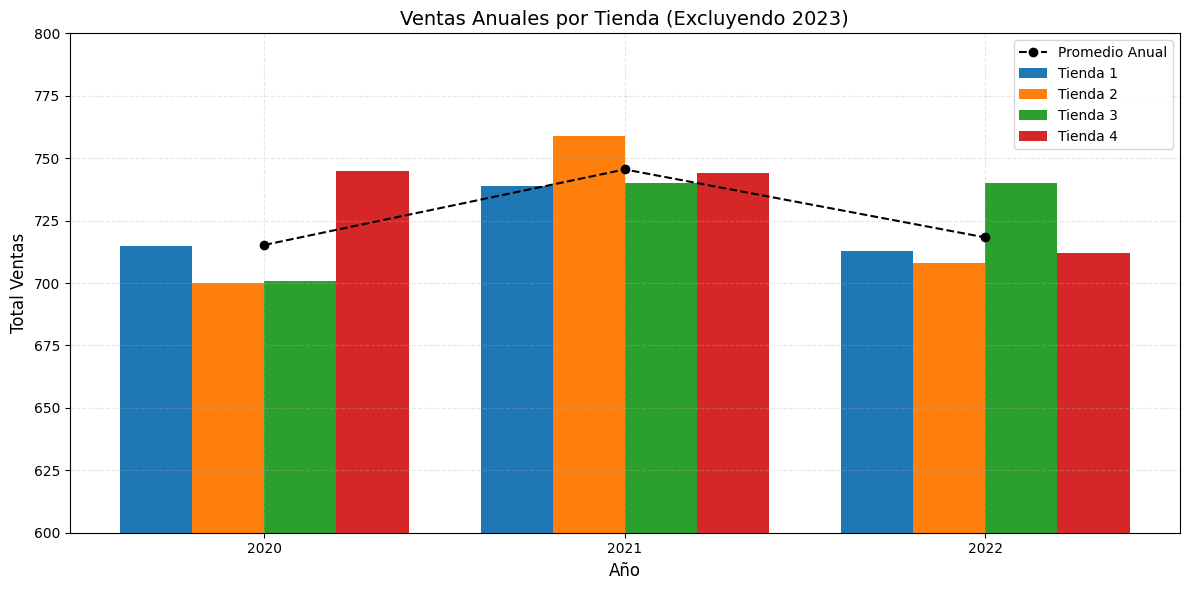

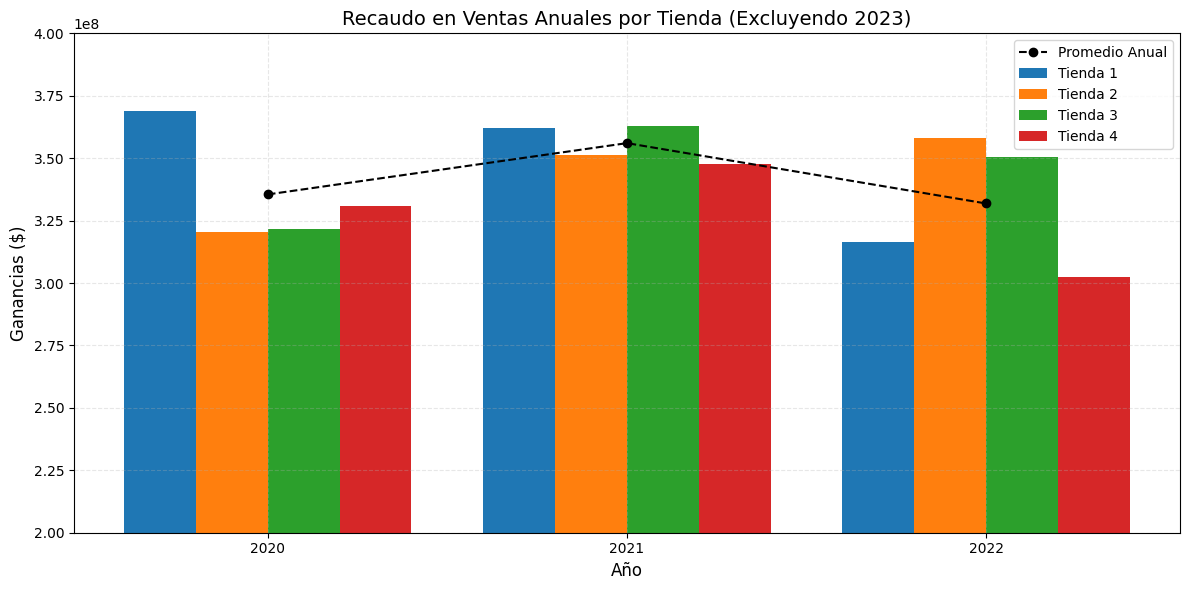

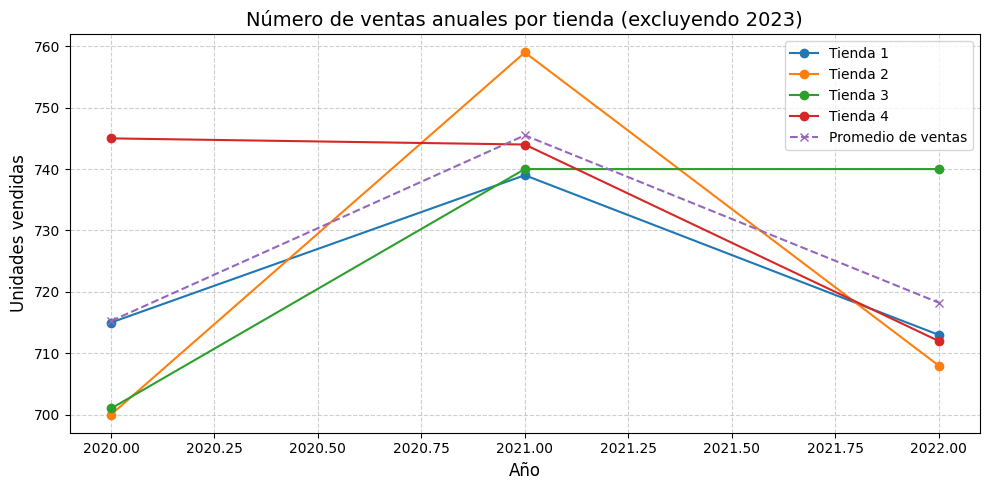

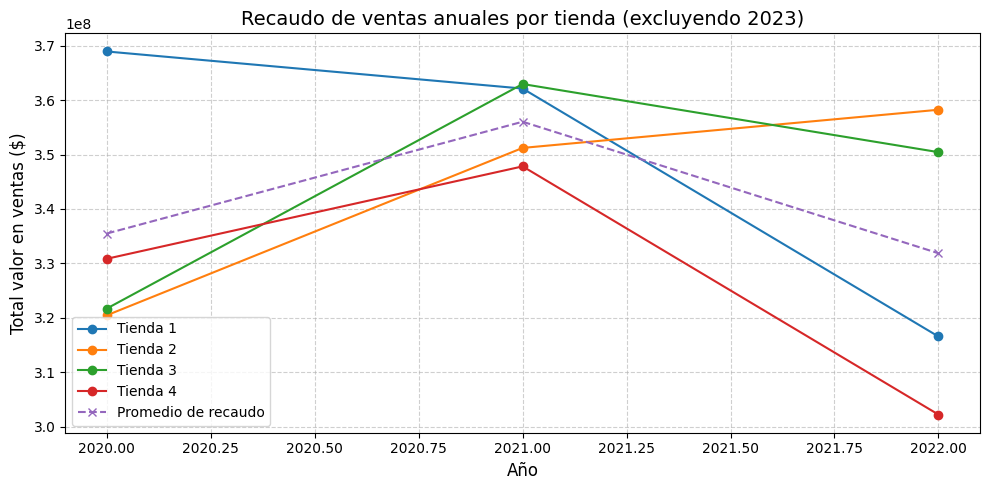

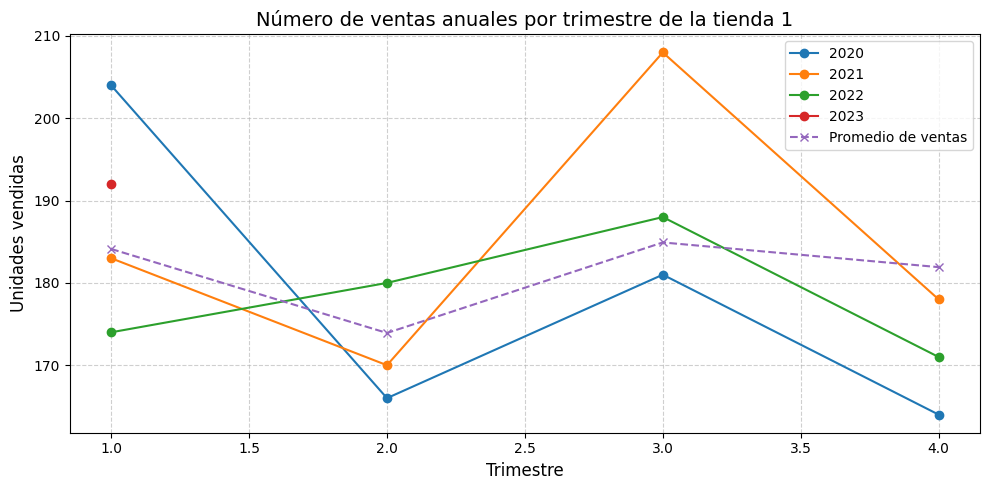

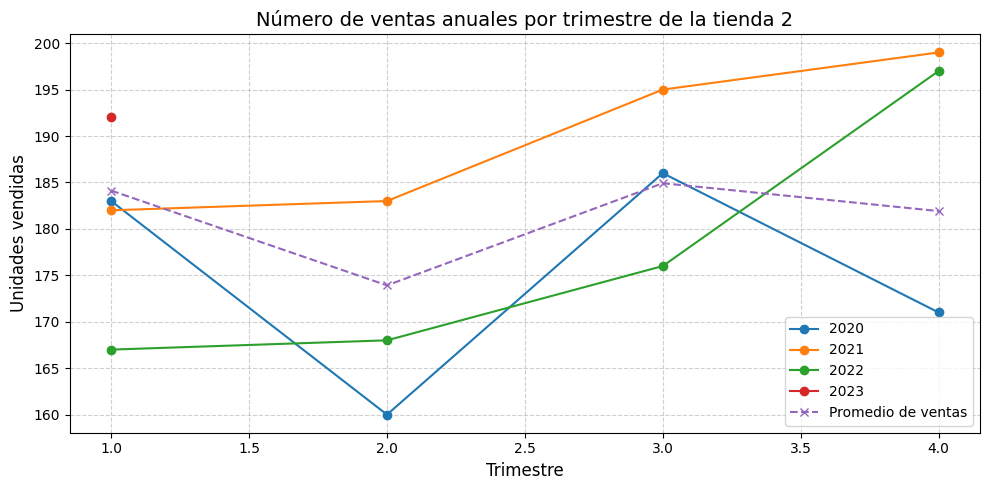

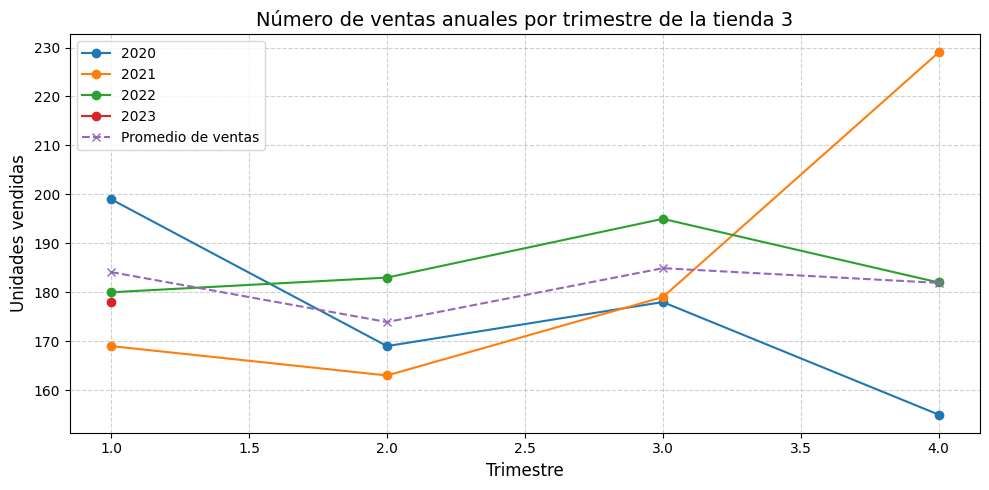

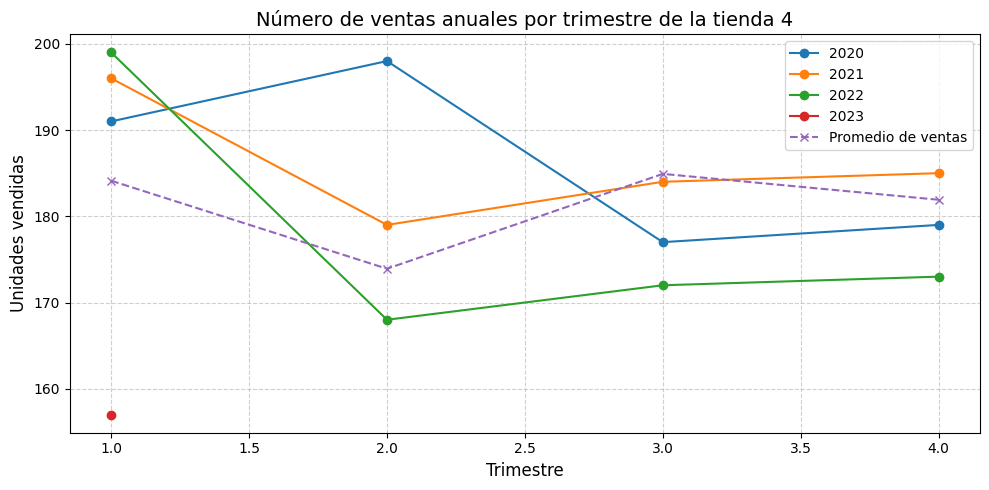

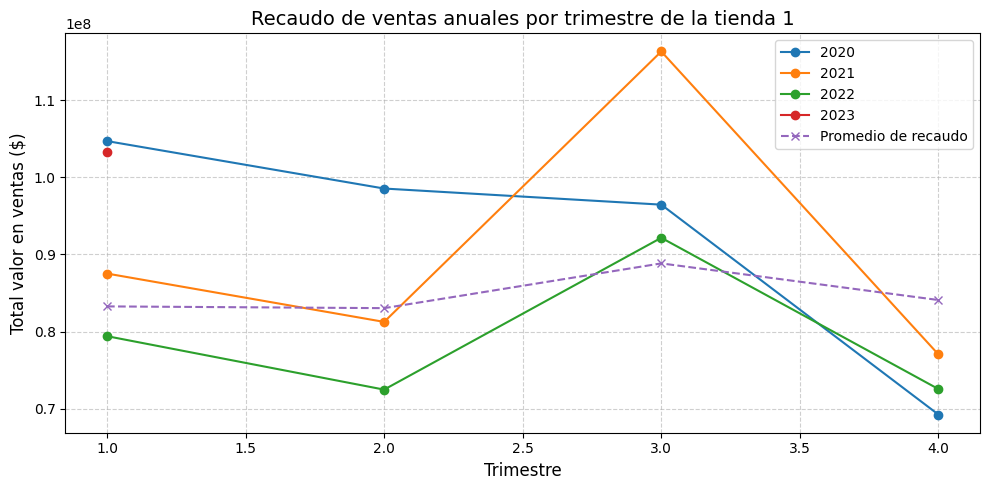

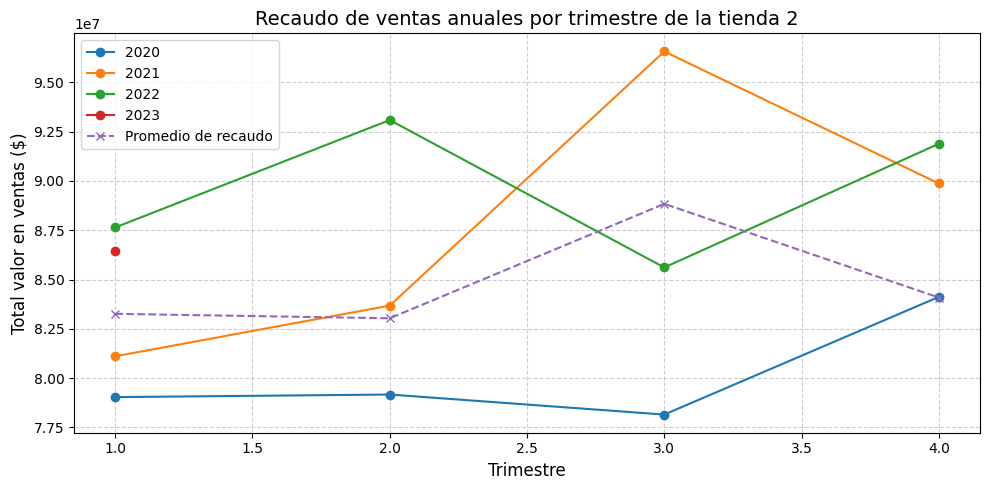

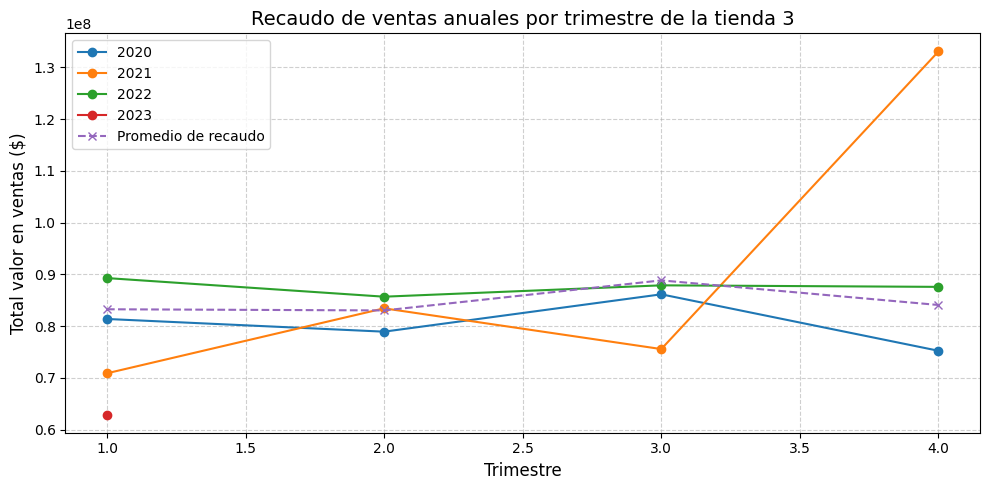

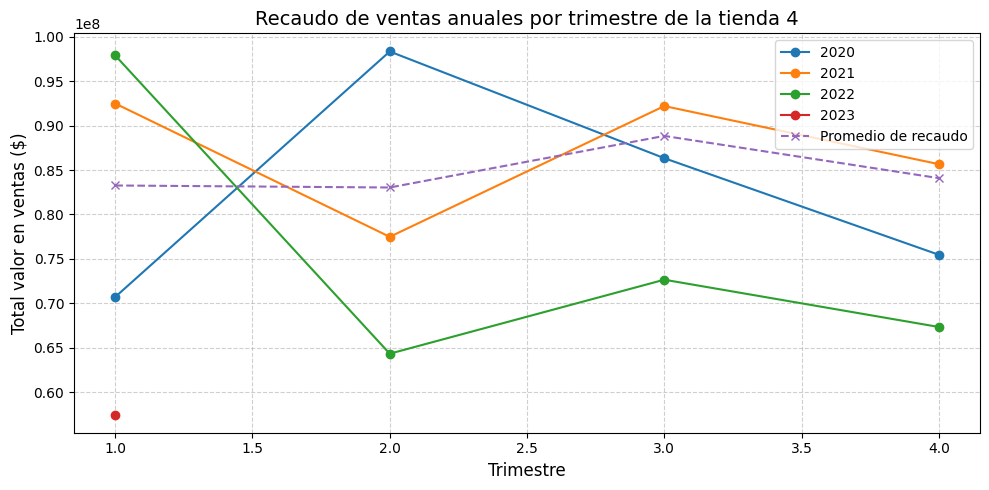

In [134]:
# TIENDA 1
# Agrupar por año y tienda
ventas_por_año_tienda = todas_tiendas.groupby(['Año', 'Tienda']).agg(
    Total_Ventas=('Precio', 'count'),
    Total_Valor_Ventas=('Precio', 'sum'),
    Promedio_Valor_Ventas = ('Precio', 'mean')
).reset_index()

# print(ventas_por_año_tienda])

# Agrupar por trimestre y tienda
ventas_por_trimestre_tienda = todas_tiendas.groupby(['Trimestre', 'Tienda']).agg(
    Total_Ventas=('Precio', 'count'),
    Total_Valor_Ventas=('Precio', 'sum'),
    Promedio_Valor_Ventas = ('Precio', 'mean')
).reset_index()

print('ventas_por_trimestre_tienda')
print(ventas_por_trimestre_tienda)

# Agrupar por año, trimestre y tienda
ventas_por_año_trimestre_tienda = todas_tiendas.groupby(['Año', 'Tienda', 'Trimestre']).agg(
    Total_Ventas = ('Precio', 'count'),
    Total_Valor_Ventas = ('Precio', 'sum'),
    Promedio_Valor_Ventas = ('Precio', 'mean')
).reset_index()

print(ventas_por_año_trimestre_tienda.head())

# Gráfico número de ventas por año de cada tienda
plt.figure(figsize=(10, 5))  # Tamaño del gráfico
años = sorted(ventas_por_año_tienda['Año'].unique())
for tienda in ventas_por_año_tienda['Tienda'].unique():
  datos_tienda = ventas_por_año_tienda[ventas_por_año_tienda['Tienda'] == tienda]
  plt.plot(años, datos_tienda['Total_Ventas'], marker="o", linestyle="-", label=f"Tienda {tienda}")

# Personalización
plt.title("Número de ventas anuales por tienda", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Unidades vendidas", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()  # Muestra leyenda con años diferenciados

# Rotar etiquetas si es necesario
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico número de ventas por trimestre de cada tienda
plt.figure(figsize=(10, 5))  # Tamaño del gráfico
trimestres = sorted(ventas_por_trimestre_tienda['Trimestre'].unique())
for tienda in ventas_por_trimestre_tienda['Tienda'].unique():
  datos_tienda = ventas_por_trimestre_tienda[ventas_por_trimestre_tienda['Tienda'] == tienda]
  plt.plot(trimestres, datos_tienda['Total_Ventas'], marker="o", linestyle="-", label=f"Tienda {tienda}")

# Personalización
plt.title("Número de ventas trimestrales por tienda", fontsize=14)
plt.xlabel("Trimestre", fontsize=12)
plt.ylabel("Unidades vendidas", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()  # Muestra leyenda con años diferenciados

# Rotar etiquetas si es necesario
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de recuado de ventas por trimestre de cada tienda
plt.figure(figsize=(10, 5))  # Tamaño del gráfico
trimestres = sorted(ventas_por_trimestre_tienda['Trimestre'].unique())
for tienda in ventas_por_trimestre_tienda['Tienda'].unique():
  datos_tienda = ventas_por_trimestre_tienda[ventas_por_trimestre_tienda['Tienda'] == tienda]
  plt.plot(trimestres, datos_tienda['Total_Valor_Ventas'], marker="o", linestyle="-", label=f"Tienda {tienda}")

# Personalización
plt.title("Recaudo por ventas trimestrales por tienda", fontsize=14)
plt.xlabel("Trimestre", fontsize=12)
plt.ylabel("Ganancias ($)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()  # Muestra leyenda con años diferenciados

# Rotar etiquetas si es necesario
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Filtrando quitando 2023 (porque al no estar consolidado todo el año causa una observación anómala)
ventas_por_año_tienda_filtradas = ventas_por_año_tienda[ventas_por_año_tienda['Año'] != 2023]
print('ventas_por_año_tienda_filtradas')
print(ventas_por_año_tienda_filtradas)


# Gráfico de barras de numero de ventas por tienda y por año, con promedio de número de vetas anual, quitando 2023
# 2. Configurar gráfico
años_bar = sorted(ventas_por_año_tienda_filtradas['Año'].unique())  # Años filtrados
x_bar = np.arange(len(años_bar))  # Posiciones base
width_bar = 0.2  # Ancho de barras

plt.figure(figsize=(12, 6))

# 3. Graficar (usando DataFrames filtrados)
for i, tienda in enumerate(sorted(ventas_por_año_tienda_filtradas['Tienda'].unique())):
    df = ventas_por_año_tienda_filtradas[ventas_por_año_tienda_filtradas['Tienda'] == tienda]
    plt.bar(
        x_bar + i * width_bar,
        df['Total_Ventas'],
        width=width_bar,
        label=f'Tienda {tienda}'
    )
# 4. Calcular promedio por año
# Convertimos a un DataFrame con los totales de cada tienda por año
promedios_ventas = []
for año in sorted(ventas_por_año_tienda_filtradas['Año'].unique()):
  datos_año = ventas_por_año_tienda_filtradas[ventas_por_año_tienda_filtradas['Año'] == año]
  promedios_ventas.append(sum(datos_año['Total_Ventas']) / len(datos_año))
# df_promedios = tiendas_filtradas[0][['Fecha de Compra']].copy()
# for i, df in enumerate(tiendas_filtradas):
#     df_promedios[f'Tienda_{i+1}'] = df['Total_Ventas'].values

# df_promedios['Promedio'] = df_promedios[[f'Tienda_{i+1}' for i in range(4)]].mean(axis=1)

# 4. Dibujar puntos de promedio con línea punteada
plt.plot(
    x_bar + width_bar * 1.5,  # Centrar sobre el grupo de barras
    promedios_ventas,
    marker='o',
    linestyle='--',
    color='black',
    label='Promedio Anual'
)

# 4. Personalización
plt.title("Ventas Anuales por Tienda (Excluyendo 2023)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Total Ventas", fontsize=12)
plt.ylim(600, 800)
plt.xticks(x_bar + width_bar * 1.5, años_bar)  # Etiquetas de años (sin 2023)
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Gráfico de barras de recaudo de ventas por tienda y por año, con promedio de número de vetas anual, quitando 2023
# 2. Configurar gráfico
años_bar = sorted(ventas_por_año_tienda_filtradas['Año'].unique())  # Años filtrados
x_bar = np.arange(len(años_bar))  # Posiciones base
width_bar = 0.2  # Ancho de barras

plt.figure(figsize=(12, 6))

# 3. Graficar (usando DataFrames filtrados)
for i, tienda in enumerate(sorted(ventas_por_año_tienda_filtradas['Tienda'].unique())):
    df = ventas_por_año_tienda_filtradas[ventas_por_año_tienda_filtradas['Tienda'] == tienda]
    plt.bar(
        x_bar + i * width_bar,
        df['Total_Valor_Ventas'],
        width=width_bar,
        label=f'Tienda {tienda}'
    )
# 4. Calcular promedio por año
# Convertimos a un DataFrame con los totales de cada tienda por año
promedios_ventas = []
for año in sorted(ventas_por_año_tienda_filtradas['Año'].unique()):
  datos_año = ventas_por_año_tienda_filtradas[ventas_por_año_tienda_filtradas['Año'] == año]
  promedios_ventas.append(sum(datos_año['Total_Valor_Ventas']) / len(datos_año))

# 4. Dibujar puntos de promedio con línea punteada
plt.plot(
    x_bar + width_bar * 1.5,  # Centrar sobre el grupo de barras
    promedios_ventas,
    marker='o',
    linestyle='--',
    color='black',
    label='Promedio Anual'
)

# 4. Personalización
plt.title("Recaudo en Ventas Anuales por Tienda (Excluyendo 2023)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Ganancias ($)", fontsize=12)
plt.ylim(200000000,400000000)
plt.xticks(x_bar + width_bar * 1.5, años_bar)  # Etiquetas de años (sin 2023)
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Gráfico número de ventas por año de cada tienda quitando 2023
plt.figure(figsize=(10, 5))  # Tamaño del gráfico
años = sorted(ventas_por_año_tienda_filtradas['Año'].unique())
for tienda in ventas_por_año_tienda_filtradas['Tienda'].unique():
  datos_tienda = ventas_por_año_tienda_filtradas[ventas_por_año_tienda_filtradas['Tienda'] == tienda]
  plt.plot(años, datos_tienda['Total_Ventas'], marker="o", linestyle="-", label=f"Tienda {tienda}")

promedios_ventas = []
for año in sorted(ventas_por_año_tienda_filtradas['Año'].unique()):
  datos_año = ventas_por_año_tienda_filtradas[ventas_por_año_tienda_filtradas['Año'] == año]
  promedios_ventas.append(sum(datos_año['Total_Ventas']) / len(datos_año))

plt.plot(sorted(ventas_por_año_tienda_filtradas['Año'].unique()), promedios_ventas, marker="x", linestyle="--", label=f"Promedio de ventas")
# Personalización
plt.title("Número de ventas anuales por tienda (excluyendo 2023)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Unidades vendidas", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()  # Muestra leyenda con años diferenciados

# Rotar etiquetas si es necesario
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico valor de ventas por año de cada tienda quitando 2023
plt.figure(figsize=(10, 5))  # Tamaño del gráfico
años = ventas_por_año_tienda_filtradas['Año'].unique()
for tienda in ventas_por_año_tienda_filtradas['Tienda'].unique():
  datos_tienda = ventas_por_año_tienda_filtradas[ventas_por_año_tienda_filtradas['Tienda'] == tienda]
  plt.plot(años, datos_tienda['Total_Valor_Ventas'], marker="o", linestyle="-", label=f"Tienda {tienda}")

promedios_recaudo = []
for año in sorted(ventas_por_año_tienda_filtradas['Año'].unique()):
  datos_año = ventas_por_año_tienda_filtradas[ventas_por_año_tienda_filtradas['Año'] == año]
  promedios_recaudo.append(sum(datos_año['Total_Valor_Ventas']) / len(datos_año))

plt.plot(sorted(ventas_por_año_tienda_filtradas['Año'].unique()), promedios_recaudo, marker="x", linestyle="--", label=f"Promedio de recaudo")
# Personalización
plt.title("Recaudo de ventas anuales por tienda (excluyendo 2023)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Total valor en ventas ($)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()  # Muestra leyenda con años diferenciados

# Rotar etiquetas si es necesario
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico número de ventas por triemestre de cada año de cada tienda
for tienda in ventas_por_año_trimestre_tienda['Tienda'].unique():
  plt.figure(figsize=(10, 5))  # Tamaño del gráfico
  for año in ventas_por_año_trimestre_tienda['Año'].unique():
    datos_tienda = ventas_por_año_trimestre_tienda[(ventas_por_año_trimestre_tienda['Tienda'] == tienda) & (ventas_por_año_trimestre_tienda['Año'] == año)]
    plt.plot(datos_tienda['Trimestre'], datos_tienda['Total_Ventas'], marker="o", linestyle="-", label=año)
  promedios_ventas_trimestre = []
  for trimestre in sorted(ventas_por_año_trimestre_tienda['Trimestre'].unique()):
    datos_trimestre = ventas_por_año_trimestre_tienda[ventas_por_año_trimestre_tienda['Trimestre'] == trimestre]
    promedios_ventas_trimestre.append(sum(datos_trimestre['Total_Ventas']) / len(datos_trimestre))
  plt.plot(sorted(ventas_por_año_trimestre_tienda['Trimestre'].unique()), promedios_ventas_trimestre, marker="x", linestyle="--", label=f"Promedio de ventas")
  # Personalización
  plt.title(f"Número de ventas anuales por trimestre de la tienda {tienda}", fontsize=14)
  plt.xlabel("Trimestre", fontsize=12)
  plt.ylabel("Unidades vendidas", fontsize=12)
  plt.grid(True, linestyle="--", alpha=0.6)
  plt.legend()  # Muestra leyenda con años diferenciados

  # Rotar etiquetas si es necesario
  # plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

# Gráfico recaudo de ventas por trimestre de cada año de cada tienda
for tienda in ventas_por_año_trimestre_tienda['Tienda'].unique():
  plt.figure(figsize=(10, 5))  # Tamaño del gráfico
  for año in ventas_por_año_trimestre_tienda['Año'].unique():
    datos_tienda = ventas_por_año_trimestre_tienda[(ventas_por_año_trimestre_tienda['Tienda'] == tienda) & (ventas_por_año_trimestre_tienda['Año'] == año)]
    plt.plot(datos_tienda['Trimestre'], datos_tienda['Total_Valor_Ventas'], marker="o", linestyle="-", label=año)
  promedios_recaudo_trimestre = []
  for trimestre in sorted(ventas_por_año_trimestre_tienda['Trimestre'].unique()):
    datos_trimestre = ventas_por_año_trimestre_tienda[ventas_por_año_trimestre_tienda['Trimestre'] == trimestre]
    promedios_recaudo_trimestre.append(sum(datos_trimestre['Total_Valor_Ventas']) / len(datos_trimestre))
  plt.plot(sorted(ventas_por_año_trimestre_tienda['Trimestre'].unique()), promedios_recaudo_trimestre, marker="x", linestyle="--", label=f"Promedio de recaudo")
  # Personalización
  plt.title(f"Recaudo de ventas anuales por trimestre de la tienda {tienda}", fontsize=14)
  plt.xlabel("Trimestre", fontsize=12)
  plt.ylabel("Total valor en ventas ($)", fontsize=12)
  plt.grid(True, linestyle="--", alpha=0.6)
  plt.legend()  # Muestra leyenda con años diferenciados

  # Rotar etiquetas si es necesario
  # plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

# 2. Ventas por categoría

ventas_por_categoria_tiendas
    Categoría del Producto  Total_Ventas  Total_Valor_Ventas Tienda
0  Artículos para el hogar           171          12698400.0      1
1     Deportes y diversión           284          39290000.0      1
2        Electrodomésticos           312         363685200.0      1
3             Electrónicos           448         429493500.0      1
4   Instrumentos musicales           182          91299000.0      1
5                 Juguetes           324          17995700.0      1
6                   Libros           173           8784900.0      1
7                  Muebles           465         187633700.0      1
0  Artículos para el hogar           181          14746900.0      2
1     Deportes y diversión           275          34744500.0      2
2        Electrodomésticos           305         348567800.0      2
3             Electrónicos           422         410831100.0      2
4   Instrumentos musicales           224         104990300.0      2
5                 J

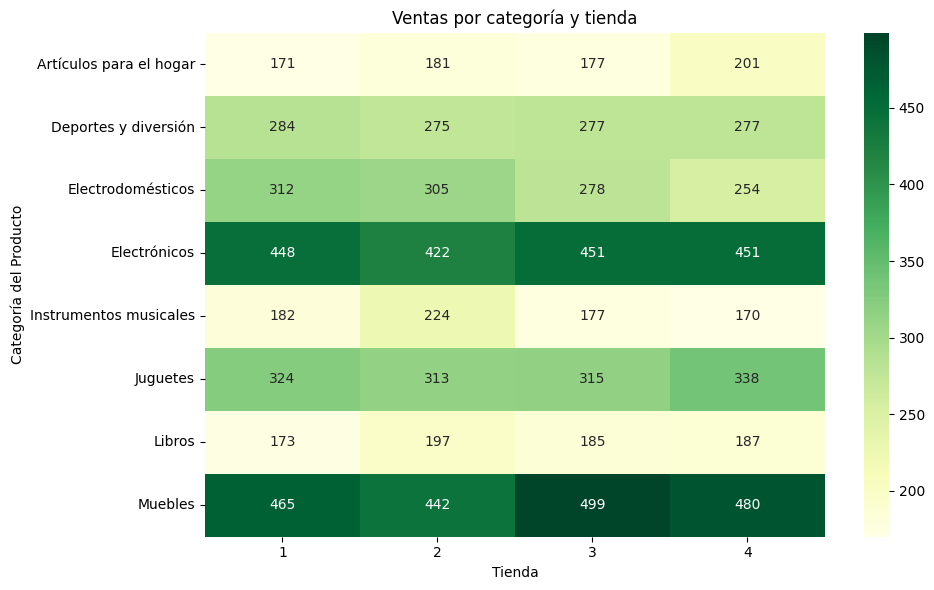

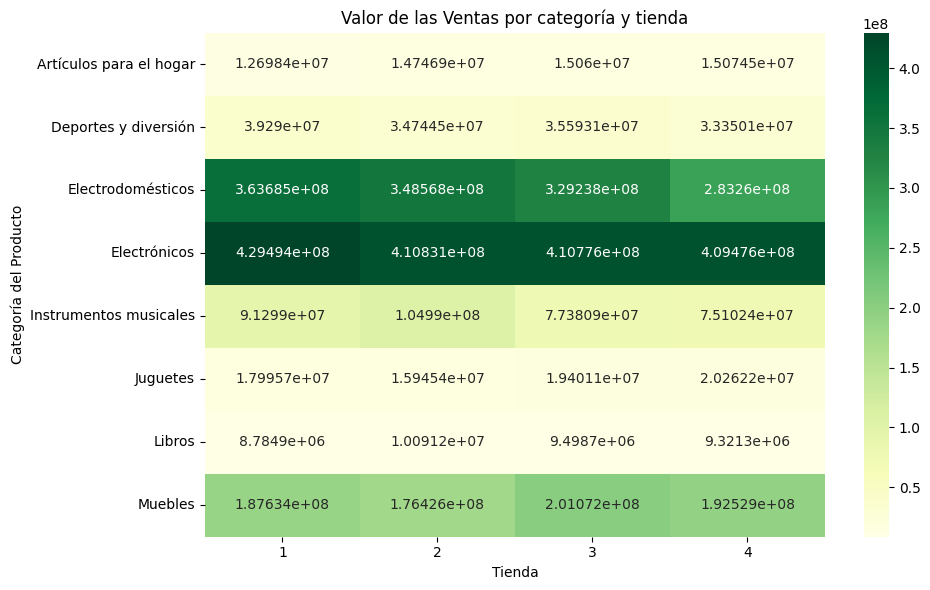

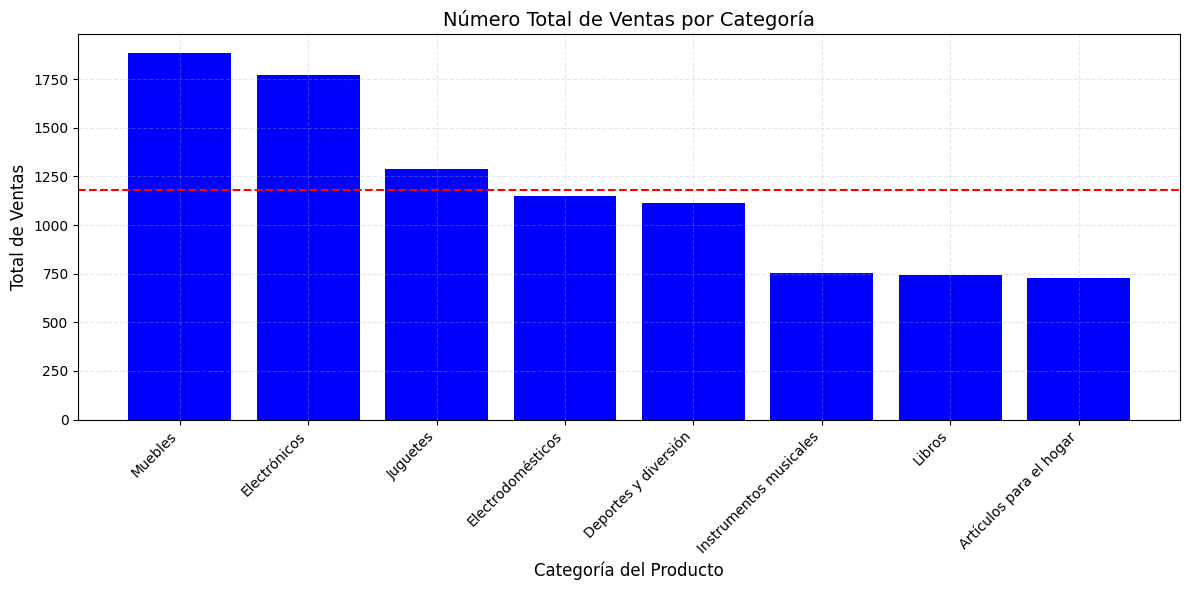

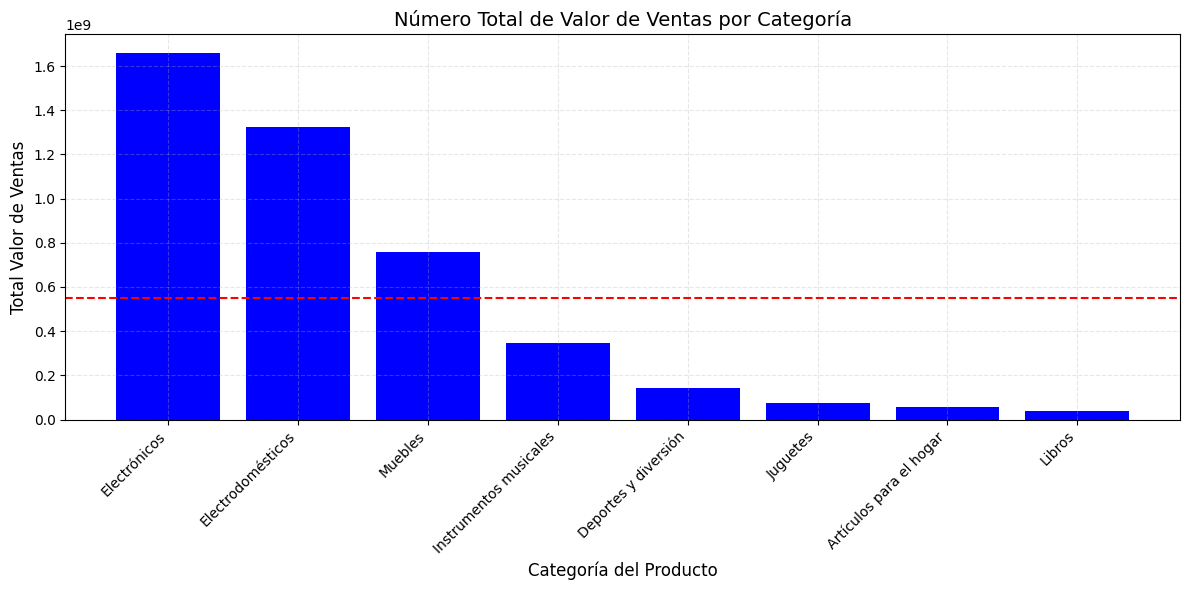

año-categoria
    Fecha de Compra   Categoría del Producto  Total_Ventas  Total_Valor_Ventas
0              2020  Artículos para el hogar            59           4566900.0
1              2020     Deportes y diversión            88          13525100.0
2              2020        Electrodomésticos           111         136132300.0
3              2020             Electrónicos           127         129728600.0
4              2020   Instrumentos musicales            51          26174700.0
5              2020                 Juguetes            96           5147000.0
6              2020                   Libros            56           2879900.0
7              2020                  Muebles           127          50778700.0
8              2021  Artículos para el hogar            55           4388400.0
9              2021     Deportes y diversión            69           8887100.0
10             2021        Electrodomésticos           101         107352800.0
11             2021             Electr

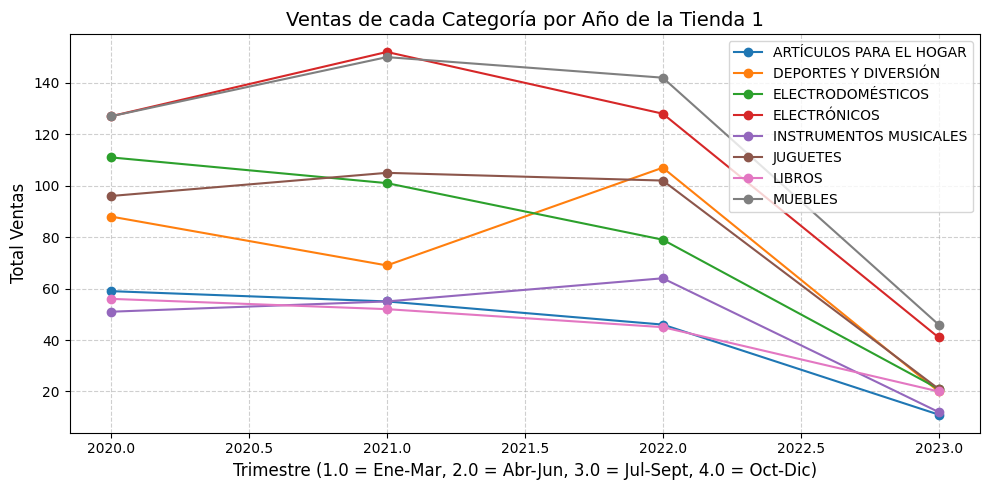

año-categoria
    Fecha de Compra   Categoría del Producto  Total_Ventas  Total_Valor_Ventas
0              2020  Artículos para el hogar            58           4677400.0
1              2020     Deportes y diversión            83          11304900.0
2              2020        Electrodomésticos            95         112443300.0
3              2020             Electrónicos           117         105710100.0
4              2020   Instrumentos musicales            57          25465800.0
5              2020                 Juguetes            95           3967800.0
6              2020                   Libros            66           3304300.0
7              2020                  Muebles           129          53593000.0
8              2021  Artículos para el hogar            57           4490500.0
9              2021     Deportes y diversión            92          12296800.0
10             2021        Electrodomésticos            98         112255600.0
11             2021             Electr

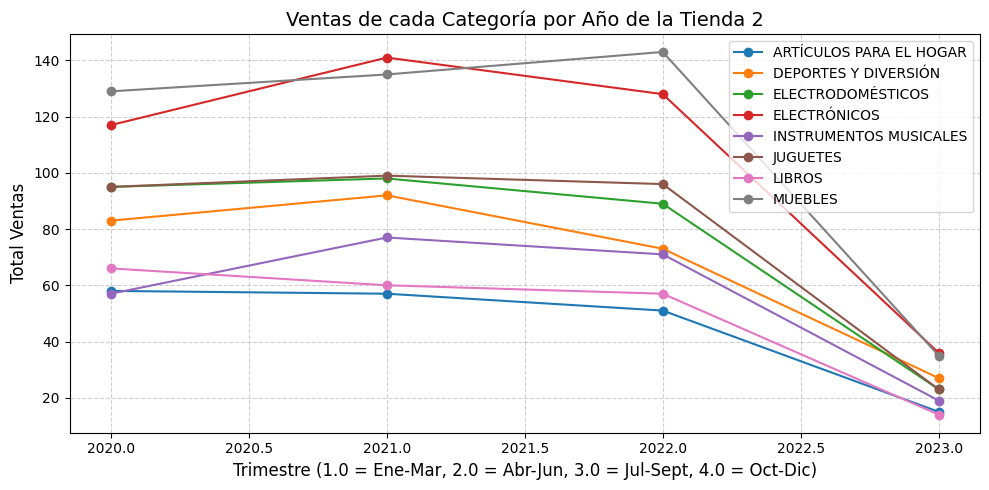

año-categoria
    Fecha de Compra   Categoría del Producto  Total_Ventas  Total_Valor_Ventas
0              2020  Artículos para el hogar            55           4028900.0
1              2020     Deportes y diversión            86           9898700.0
2              2020        Electrodomésticos            85          94273200.0
3              2020             Electrónicos           129         124495300.0
4              2020   Instrumentos musicales            44          17771000.0
5              2020                 Juguetes            96           5449600.0
6              2020                   Libros            50           2572900.0
7              2020                  Muebles           156          63217900.0
8              2021  Artículos para el hogar            47           4225200.0
9              2021     Deportes y diversión            75          11103800.0
10             2021        Electrodomésticos            95         115076200.0
11             2021             Electr

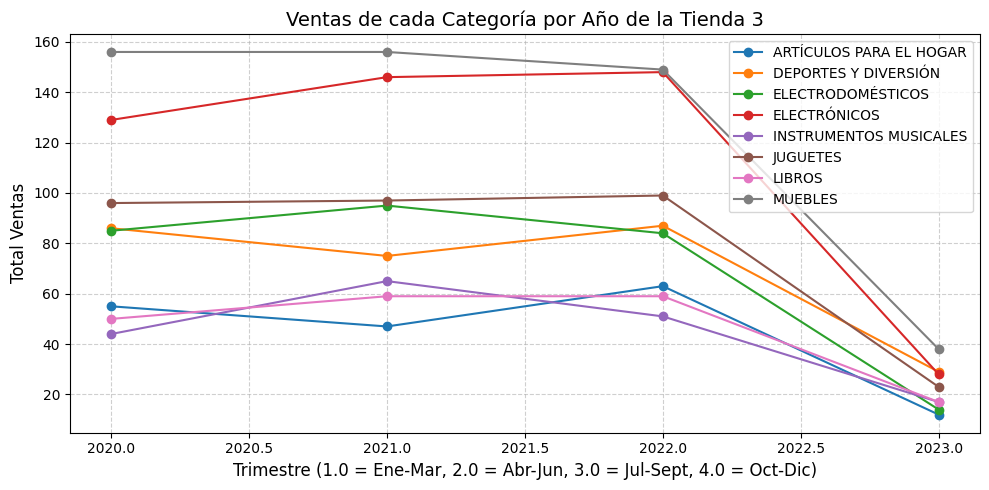

año-categoria
    Fecha de Compra   Categoría del Producto  Total_Ventas  Total_Valor_Ventas
0              2020  Artículos para el hogar            59           4575600.0
1              2020     Deportes y diversión            82          11101200.0
2              2020        Electrodomésticos            74          80890500.0
3              2020             Electrónicos           144         136151000.0
4              2020   Instrumentos musicales            59          24036600.0
5              2020                 Juguetes           107           7389000.0
6              2020                   Libros            61           2890100.0
7              2020                  Muebles           159          63813700.0
8              2021  Artículos para el hogar            52           4021300.0
9              2021     Deportes y diversión            86           6877300.0
10             2021        Electrodomésticos            86         100643000.0
11             2021             Electr

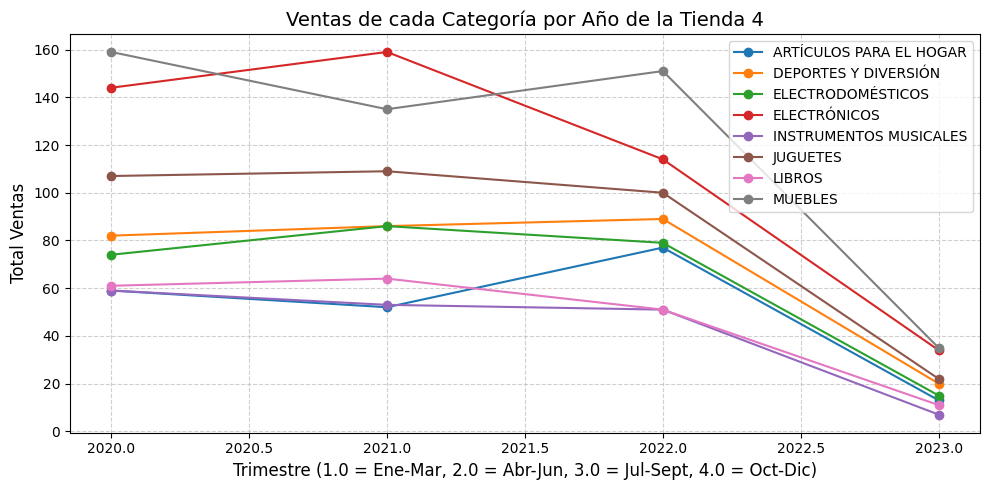

In [44]:
import seaborn as sns
# VENTAS POR CATEGORIA Y TIENDA
# Agrupar por año

ventas_por_categoria_tienda1 = tienda1.groupby('Categoría del Producto').agg(
    Total_Ventas=('Precio', 'count'),
    Total_Valor_Ventas=('Precio', 'sum'),
).reset_index()
ventas_por_categoria_tienda1['Tienda'] = '1'

ventas_por_categoria_tienda2 = tienda2.groupby(tienda2['Categoría del Producto']).agg(
    Total_Ventas=('Precio', 'count'),
    Total_Valor_Ventas=('Precio', 'sum'),
).reset_index()

ventas_por_categoria_tienda2['Tienda'] = '2'

ventas_por_categoria_tienda3 = tienda3.groupby(tienda3['Categoría del Producto']).agg(
    Total_Ventas=('Precio', 'count'),
    Total_Valor_Ventas=('Precio', 'sum'),
).reset_index()

ventas_por_categoria_tienda3['Tienda'] = '3'

ventas_por_categoria_tienda4 = tienda4.groupby(tienda4['Categoría del Producto']).agg(
    Total_Ventas=('Precio', 'count'),
    Total_Valor_Ventas=('Precio', 'sum'),
).reset_index()

ventas_por_categoria_tienda4['Tienda'] = '4'

ventas_por_categoria_tiendas = pd.concat([ventas_por_categoria_tienda1, ventas_por_categoria_tienda2, ventas_por_categoria_tienda3, ventas_por_categoria_tienda4], axis=0)
print('ventas_por_categoria_tiendas')
print(ventas_por_categoria_tiendas)

# Crear tabla dinámica para heatmap
heatmap_data = ventas_por_categoria_tiendas.pivot(
    index='Categoría del Producto',
    columns='Tienda',
    values='Total_Ventas'
)

# Crear heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlGn", annot=True, fmt='g')
plt.title("Ventas por categoría y tienda")
plt.ylabel("Categoría del Producto")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()

# VALOR VENTAS POR CATEGORIA Y TIENDA

# Crear tabla dinámica para heatmap
heatmap_data = ventas_por_categoria_tiendas.pivot(
    index='Categoría del Producto',
    columns='Tienda',
    values='Total_Valor_Ventas'
)

# Crear heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlGn", annot=True, fmt='g')
plt.title("Valor de las Ventas por categoría y tienda")
plt.ylabel("Categoría del Producto")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()

# Agrupar por categoría sumando las ventas de todas las tiendas
ventas_por_categoria_total = ventas_por_categoria_tiendas.groupby('Categoría del Producto')['Total_Ventas'].sum().reset_index()

# Calcular promedio general
promedio_ventas = ventas_por_categoria_total['Total_Ventas'].mean()

# Ordenar por número de ventas (opcional)
ventas_por_categoria_total = ventas_por_categoria_total.sort_values('Total_Ventas', ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(ventas_por_categoria_total['Categoría del Producto'], ventas_por_categoria_total['Total_Ventas'], color='blue')
# Agregar línea horizontal de promedio
plt.axhline(promedio_ventas, color='red', linestyle='--', label=f'Promedio: {promedio_ventas:.0f}')

plt.title("Número Total de Ventas por Categoría", fontsize=14)
plt.xlabel("Categoría del Producto", fontsize=12)
plt.ylabel("Total de Ventas", fontsize=12)
plt.xticks(rotation=45, ha='right')  # mejora la lectura
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

# Agrupar por categoría sumando el valor de las ventas de todas las tiendas
ventas_valor_por_categoria_total = ventas_por_categoria_tiendas.groupby('Categoría del Producto')['Total_Valor_Ventas'].sum().reset_index()

# Calcular promedio general
promedio_valor_ventas = ventas_valor_por_categoria_total['Total_Valor_Ventas'].mean()

# Ordenar por valor de ventas (opcional)
ventas_valor_por_categoria_total = ventas_valor_por_categoria_total.sort_values('Total_Valor_Ventas', ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(ventas_valor_por_categoria_total['Categoría del Producto'], ventas_valor_por_categoria_total['Total_Valor_Ventas'], color='blue')
# Agregar línea horizontal de promedio
plt.axhline(promedio_valor_ventas, color='red', linestyle='--', label=f'Promedio: {promedio_valor_ventas:.0f}')

plt.title("Número Total de Valor de Ventas por Categoría", fontsize=14)
plt.xlabel("Categoría del Producto", fontsize=12)
plt.ylabel("Total Valor de Ventas", fontsize=12)
plt.xticks(rotation=45, ha='right')  # mejora la lectura
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

# Agrupar por año
# Tienda 1
ventas_por_año_categoria_tienda1 = tienda1.groupby([tienda1['Fecha de Compra'].dt.year, tienda1['Categoría del Producto']]).agg(
    Total_Ventas=('Precio', 'count'),
    Total_Valor_Ventas=('Precio', 'sum')
).reset_index()
tienda1['Año'] = tienda1['Fecha de Compra'].dt.year
print('año-categoria')
print(ventas_por_año_categoria_tienda1)
datos_categoria = ventas_por_año_categoria_tienda1[ventas_por_año_categoria_tienda1['Categoría del Producto'] == 'Muebles']
print('datos')
print(datos_categoria)

plt.figure(figsize=(10, 5))  # Tamaño del gráfico
# Iterar por cada categoría único
for categoria in sorted(tienda1['Categoría del Producto'].unique()):
    # Filtrar datos para el año actual
    datos_categoria = ventas_por_año_categoria_tienda1[ventas_por_año_categoria_tienda1['Categoría del Producto'] == categoria]

    # Extraer fechas (Trimestre) y ventas
    fechas = datos_categoria['Fecha de Compra']
    ventas = datos_categoria['Total_Ventas']  # Sin [] adicionales

    # Graficar (usamos label diferente por año)
    plt.plot(fechas, ventas, marker="o", linestyle="-", label=f"{categoria.upper()}")

# Personalización
plt.title("Ventas de cada Categoría por Año de la Tienda 1", fontsize=14)
plt.xlabel("Trimestre (1.0 = Ene-Mar, 2.0 = Abr-Jun, 3.0 = Jul-Sept, 4.0 = Oct-Dic)", fontsize=12)
plt.ylabel("Total Ventas", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()  # Muestra leyenda con años diferenciados

# Rotar etiquetas si es necesario
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tienda 2
ventas_por_año_categoria_tienda2 = tienda2.groupby([tienda2['Fecha de Compra'].dt.year, tienda2['Categoría del Producto']]).agg(
    Total_Ventas=('Precio', 'count'),
    Total_Valor_Ventas=('Precio', 'sum')
).reset_index()
tienda2['Año'] = tienda2['Fecha de Compra'].dt.year
print('año-categoria')
print(ventas_por_año_categoria_tienda2)
datos_categoria = ventas_por_año_categoria_tienda2[ventas_por_año_categoria_tienda2['Categoría del Producto'] == 'Muebles']
print('datos')
print(datos_categoria)

plt.figure(figsize=(10, 5))  # Tamaño del gráfico
# Iterar por cada categoría único
for categoria in sorted(tienda2['Categoría del Producto'].unique()):
    # Filtrar datos para el año actual
    datos_categoria = ventas_por_año_categoria_tienda2[ventas_por_año_categoria_tienda2['Categoría del Producto'] == categoria]

    # Extraer fechas (Trimestre) y ventas
    fechas = datos_categoria['Fecha de Compra']
    ventas = datos_categoria['Total_Ventas']  # Sin [] adicionales

    # Graficar (usamos label diferente por año)
    plt.plot(fechas, ventas, marker="o", linestyle="-", label=f"{categoria.upper()}")

# Personalización
plt.title("Ventas de cada Categoría por Año de la Tienda 2", fontsize=14)
plt.xlabel("Trimestre (1.0 = Ene-Mar, 2.0 = Abr-Jun, 3.0 = Jul-Sept, 4.0 = Oct-Dic)", fontsize=12)
plt.ylabel("Total Ventas", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()  # Muestra leyenda con años diferenciados

# Rotar etiquetas si es necesario
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tienda 3
ventas_por_año_categoria_tienda3 = tienda3.groupby([tienda3['Fecha de Compra'].dt.year, tienda3['Categoría del Producto']]).agg(
    Total_Ventas=('Precio', 'count'),
    Total_Valor_Ventas=('Precio', 'sum')
).reset_index()
tienda3['Año'] = tienda3['Fecha de Compra'].dt.year
print('año-categoria')
print(ventas_por_año_categoria_tienda3)
datos_categoria = ventas_por_año_categoria_tienda3[ventas_por_año_categoria_tienda3['Categoría del Producto'] == 'Muebles']
print('datos')
print(datos_categoria)

plt.figure(figsize=(10, 5))  # Tamaño del gráfico
# Iterar por cada categoría único
for categoria in sorted(tienda3['Categoría del Producto'].unique()):
    # Filtrar datos para el año actual
    datos_categoria = ventas_por_año_categoria_tienda3[ventas_por_año_categoria_tienda3['Categoría del Producto'] == categoria]

    # Extraer fechas (Trimestre) y ventas
    fechas = datos_categoria['Fecha de Compra']
    ventas = datos_categoria['Total_Ventas']  # Sin [] adicionales

    # Graficar (usamos label diferente por año)
    plt.plot(fechas, ventas, marker="o", linestyle="-", label=f"{categoria.upper()}")

# Personalización
plt.title("Ventas de cada Categoría por Año de la Tienda 3", fontsize=14)
plt.xlabel("Trimestre (1.0 = Ene-Mar, 2.0 = Abr-Jun, 3.0 = Jul-Sept, 4.0 = Oct-Dic)", fontsize=12)
plt.ylabel("Total Ventas", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()  # Muestra leyenda con años diferenciados

# Rotar etiquetas si es necesario
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tienda 4
ventas_por_año_categoria_tienda4 = tienda4.groupby([tienda4['Fecha de Compra'].dt.year, tienda4['Categoría del Producto']]).agg(
    Total_Ventas=('Precio', 'count'),
    Total_Valor_Ventas=('Precio', 'sum')
).reset_index()
tienda4['Año'] = tienda4['Fecha de Compra'].dt.year
print('año-categoria')
print(ventas_por_año_categoria_tienda4)
# datos_categoria = ventas_por_año_categoria_tienda4[ventas_por_año_categoria_tienda4['Categoría del Producto'] == 'Muebles']
# print('datos')
# print(datos_categoria)

plt.figure(figsize=(10, 5))  # Tamaño del gráfico
# Iterar por cada categoría único
for categoria in sorted(tienda4['Categoría del Producto'].unique()):
    # Filtrar datos para el año actual
    datos_categoria = ventas_por_año_categoria_tienda4[ventas_por_año_categoria_tienda4['Categoría del Producto'] == categoria]

    # Extraer fechas (Trimestre) y ventas
    fechas = datos_categoria['Fecha de Compra']
    ventas = datos_categoria['Total_Ventas']  # Sin [] adicionales

    # Graficar (usamos label diferente por año)
    plt.plot(fechas, ventas, marker="o", linestyle="-", label=f"{categoria.upper()}")

# Personalización
plt.title("Ventas de cada Categoría por Año de la Tienda 4", fontsize=14)
plt.xlabel("Trimestre (1.0 = Ene-Mar, 2.0 = Abr-Jun, 3.0 = Jul-Sept, 4.0 = Oct-Dic)", fontsize=12)
plt.ylabel("Total Ventas", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()  # Muestra leyenda con años diferenciados

# Rotar etiquetas si es necesario
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





# 3. Calificación promedio de la tienda


   Fecha de Compra  Total_Calificaciones  Suma_Calificaciones  \
0             2020                   715                 2812   
1             2021                   739                 2927   
2             2022                   713                 2882   
0             2020                   700                 2829   
1             2021                   759                 3034   
2             2022                   708                 2901   
0             2020                   701                 2890   
1             2021                   740                 2905   
2             2022                   740                 3029   
0             2020                   745                 2996   
1             2021                   744                 2946   
2             2022                   712                 2826   

   Promedio_Calificaciones Tienda  
0                 3.932867      1  
1                 3.960758      1  
2                 4.042076      1  
0         

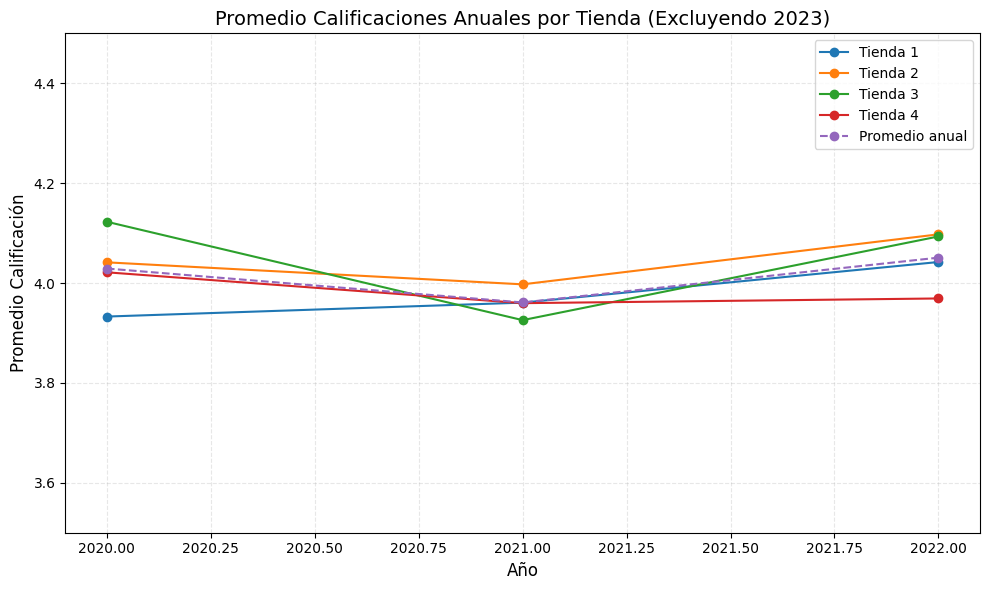

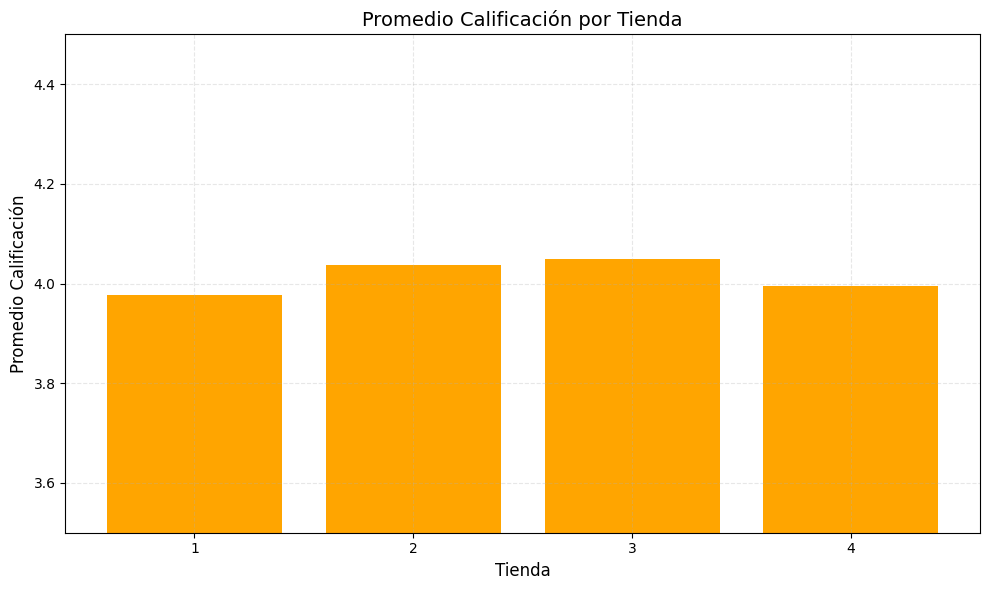

In [45]:
calificaciones_por_año_tienda1 = tienda1.groupby(tienda1['Fecha de Compra'].dt.year).agg(
    Total_Calificaciones = ('Calificación', 'count'),
    Suma_Calificaciones = ('Calificación', 'sum'),
    Promedio_Calificaciones= ('Calificación', 'mean')
).reset_index()
calificaciones_por_año_tienda1['Tienda'] = '1'

calificaciones_por_año_tienda2 = tienda2.groupby(tienda2['Fecha de Compra'].dt.year).agg(
    Total_Calificaciones = ('Calificación', 'count'),
    Suma_Calificaciones = ('Calificación', 'sum'),
    Promedio_Calificaciones=('Calificación', 'mean')
).reset_index()
calificaciones_por_año_tienda2['Tienda'] = '2'

calificaciones_por_año_tienda3 = tienda3.groupby(tienda3['Fecha de Compra'].dt.year).agg(
    Total_Calificaciones = ('Calificación', 'count'),
    Suma_Calificaciones = ('Calificación', 'sum'),
    Promedio_Calificaciones=('Calificación', 'mean')
).reset_index()
calificaciones_por_año_tienda3['Tienda'] = '3'

calificaciones_por_año_tienda4 = tienda4.groupby(tienda4['Fecha de Compra'].dt.year).agg(
    Total_Calificaciones = ('Calificación', 'count'),
    Suma_Calificaciones = ('Calificación', 'sum'),
    Promedio_Calificaciones=('Calificación', 'mean')
).reset_index()
calificaciones_por_año_tienda4['Tienda'] = '4'

calificaciones_por_año_tiendas = pd.concat([calificaciones_por_año_tienda1, calificaciones_por_año_tienda2, calificaciones_por_año_tienda3, calificaciones_por_año_tienda4], axis=0)
# Calificaciones por tienda y año
# 1. Filtrar DataFrames (excluir 2023)
tiendas_filtradas_cali = calificaciones_por_año_tienda1[calificaciones_por_año_tienda1['Fecha de Compra'] != 2023]
for df in [calificaciones_por_año_tienda2, calificaciones_por_año_tienda3, calificaciones_por_año_tienda4]:
#     tiendas_filtradas_cali.append(df[df['Fecha de Compra'] != 2023])  # Solo años != 2023
  filtro = df[df['Fecha de Compra'] != 2023]
  tiendas_filtradas_cali = pd.concat([tiendas_filtradas_cali,filtro], axis=0)

print(tiendas_filtradas_cali)

# 2. Configurar gráfico
años_cali = tiendas_filtradas_cali['Fecha de Compra'].unique()  # Años filtrados
nombres_cali = tiendas_filtradas_cali['Tienda'].unique()

plt.figure(figsize=(10, 6))

# 3. Graficar (usando DataFrames filtrados)
for nombre_tienda in nombres_cali:
    df = tiendas_filtradas_cali[tiendas_filtradas_cali['Tienda'] == nombre_tienda]
    plt.plot(df['Fecha de Compra'], df['Promedio_Calificaciones'], marker='o', linestyle='-', label=f'Tienda {nombre_tienda}')

# 4. Calcular promedio por año
# Convertimos a un DataFrame con los totales de calificaciones de cada tienda por año
df_promedios_cali = []
for año in años_cali:
  df = tiendas_filtradas_cali[tiendas_filtradas_cali['Fecha de Compra'] == año]
  df_promedios_cali.append(df['Suma_Calificaciones'].sum()/df['Total_Calificaciones'].sum())

print('promedios_cali')
print(df_promedios_cali)

plt.plot(años, df_promedios_cali, marker='o', linestyle='--', label=f'Promedio anual')
# 4. Personalización
plt.title("Promedio Calificaciones Anuales por Tienda (Excluyendo 2023)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Promedio Calificación", fontsize=12)
plt.ylim(3.5, 4.5)
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Promedio de calificacion por tienda
plt.figure(figsize=(10, 6))
promedios_tienda = []
for nombre_tienda in nombres_cali:
    df = calificaciones_por_año_tiendas[calificaciones_por_año_tiendas['Tienda'] == nombre_tienda]
    promedios_tienda.append(df['Suma_Calificaciones'].sum() / df['Total_Calificaciones'].sum())

plt.bar(nombres_cali, promedios_tienda, color='orange')

# 4. Personalización
plt.title("Promedio Calificación por Tienda", fontsize=14)
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Promedio Calificación", fontsize=12)
plt.ylim(3.5, 4.5)
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

    Categoría del Producto  Total_Ventas  Total_Valor_Ventas Tienda
0  Artículos para el hogar           171          12698400.0      1
1     Deportes y diversión           284          39290000.0      1
2        Electrodomésticos           312         363685200.0      1
3             Electrónicos           448         429493500.0      1
4   Instrumentos musicales           182          91299000.0      1
5                 Juguetes           324          17995700.0      1
6                   Libros           173           8784900.0      1
7                  Muebles           465         187633700.0      1
Productos más vendidos por tienda
  Categoría del Producto  Total_Ventas  Total_Valor_Ventas Tienda
7                Muebles           465         187633700.0      1
7                Muebles           442         176426300.0      2
7                Muebles           499         201072100.0      3
7                Muebles           480         192528900.0      4
Productos menos vendidos

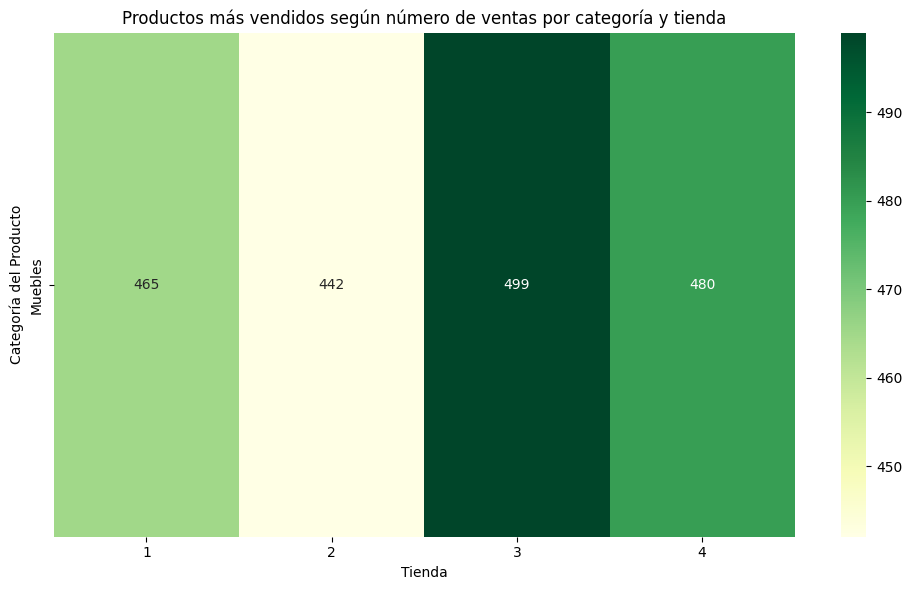

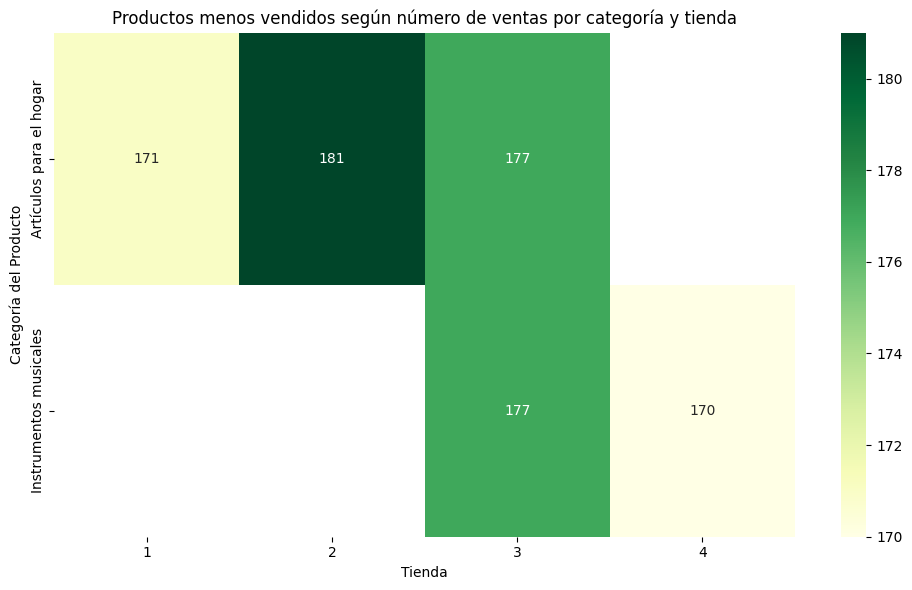

Productos con más valor generado por tienda
  Categoría del Producto  Total_Ventas  Total_Valor_Ventas Tienda
3           Electrónicos           448         429493500.0      1
3           Electrónicos           422         410831100.0      2
3           Electrónicos           451         410775800.0      3
3           Electrónicos           451         409476100.0      4
Productos con menos valor generado por tienda
  Categoría del Producto  Total_Ventas  Total_Valor_Ventas Tienda
6                 Libros           173           8784900.0      1
6                 Libros           197          10091200.0      2
6                 Libros           185           9498700.0      3
6                 Libros           187           9321300.0      4


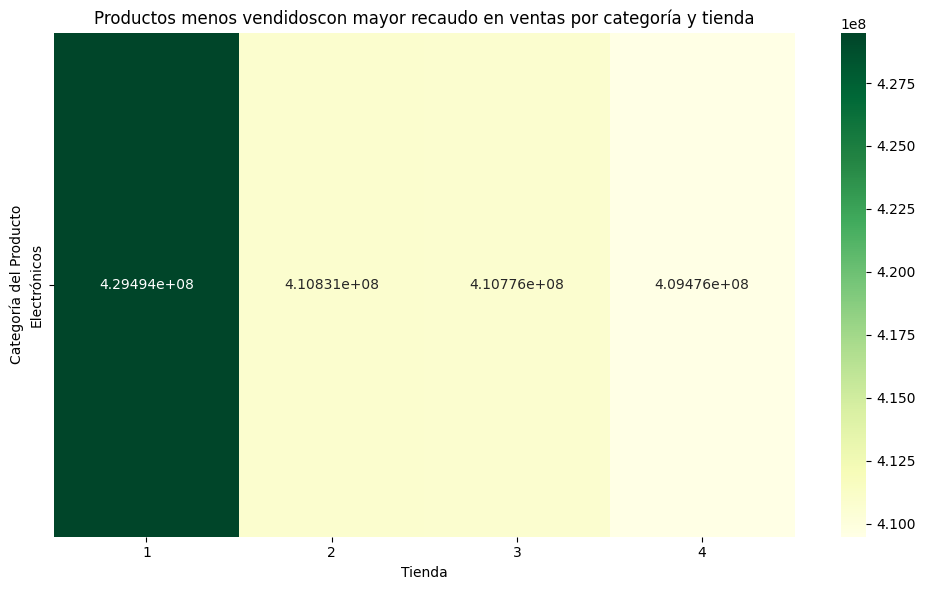

In [46]:
print(ventas_por_categoria_tienda1)
# Por número de ventas
max_value = { 'Tienda 1': 0, 'Tienda 2': 0, 'Tienda 3': 0, 'Tienda 4': 0}
min_value = { 'Tienda 1': 0, 'Tienda 2': 0, 'Tienda 3': 0, 'Tienda 4': 0}
nombres_para_value = [ventas_por_categoria_tienda1, ventas_por_categoria_tienda2, ventas_por_categoria_tienda3, ventas_por_categoria_tienda4]

for i, nombre in enumerate(max_value.keys()):
  max_value[nombre] = nombres_para_value[i][nombres_para_value[i]['Total_Ventas'] == max(nombres_para_value[i]['Total_Ventas'])]

for i, nombre in enumerate(min_value.keys()):
  min_value[nombre] = nombres_para_value[i][nombres_para_value[i]['Total_Ventas'] == min(nombres_para_value[i]['Total_Ventas'])]

productos_mas_vendidos_por_tienda  = pd.concat([max_value['Tienda 1'],max_value['Tienda 2'],max_value['Tienda 3'],max_value['Tienda 4']])
productos_menos_vendidos_por_tienda  = pd.concat([min_value['Tienda 1'],min_value['Tienda 2'],min_value['Tienda 3'],min_value['Tienda 4']])
print('Productos más vendidos por tienda')
print(productos_mas_vendidos_por_tienda)
print('Productos menos vendidos por tienda')
print(productos_menos_vendidos_por_tienda)

# Crear tabla dinámica para heatmap
heatmap_data_mas_vendidos = productos_mas_vendidos_por_tienda.pivot_table(
    index='Categoría del Producto',
    columns='Tienda',
    values='Total_Ventas',
    aggfunc='sum'
)

# Crear heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_mas_vendidos, cmap="YlGn", annot=True, fmt='g')
plt.title("Productos más vendidos según número de ventas por categoría y tienda")
plt.ylabel("Categoría del Producto")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()

# Crear tabla dinámica para heatmap
heatmap_data_menos_vendidos = productos_menos_vendidos_por_tienda.pivot_table(
    index='Categoría del Producto',
    columns='Tienda',
    values='Total_Ventas',
    aggfunc='sum'
)

# Crear heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_menos_vendidos, cmap="YlGn", annot=True, fmt='g')
plt.title("Productos menos vendidos según número de ventas por categoría y tienda")
plt.ylabel("Categoría del Producto")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()

# Por valor de ventas
max_value_valor = { 'Tienda 1': 0, 'Tienda 2': 0, 'Tienda 3': 0, 'Tienda 4': 0}
min_value_valor = { 'Tienda 1': 0, 'Tienda 2': 0, 'Tienda 3': 0, 'Tienda 4': 0}

for i, nombre in enumerate(max_value_valor.keys()):
  max_value_valor[nombre] = nombres_para_value[i][nombres_para_value[i]['Total_Valor_Ventas'] == max(nombres_para_value[i]['Total_Valor_Ventas'])]

for i, nombre in enumerate(min_value_valor.keys()):
  min_value_valor[nombre] = nombres_para_value[i][nombres_para_value[i]['Total_Valor_Ventas'] == min(nombres_para_value[i]['Total_Valor_Ventas'])]

productos_mas_recaudo_por_tienda  = pd.concat([max_value_valor['Tienda 1'],max_value_valor['Tienda 2'],max_value_valor['Tienda 3'],max_value_valor['Tienda 4']])
productos_menos_recaudo_por_tienda  = pd.concat([min_value_valor['Tienda 1'],min_value_valor['Tienda 2'],min_value_valor['Tienda 3'],min_value_valor['Tienda 4']])
print('Productos con más valor generado por tienda')
print(productos_mas_recaudo_por_tienda)
print('Productos con menos valor generado por tienda')
print(productos_menos_recaudo_por_tienda)

# Crear tabla dinámica para heatmap
heatmap_data_mas_recaudo = productos_mas_recaudo_por_tienda.pivot_table(
    index='Categoría del Producto',
    columns='Tienda',
    values='Total_Valor_Ventas',
    aggfunc='sum'
)

# Crear heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_mas_recaudo, cmap="YlGn", annot=True, fmt='g')
plt.title("Productos menos vendidoscon mayor recaudo en ventas por categoría y tienda")
plt.ylabel("Categoría del Producto")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()

Productos más vendidos
    Fecha de Compra Categoría del Producto  Total_Ventas  Total_Valor_Ventas
7              2020                Muebles           571         231403300.0
11             2021           Electrónicos           598         559414800.0
23             2022                Muebles           585         235755800.0


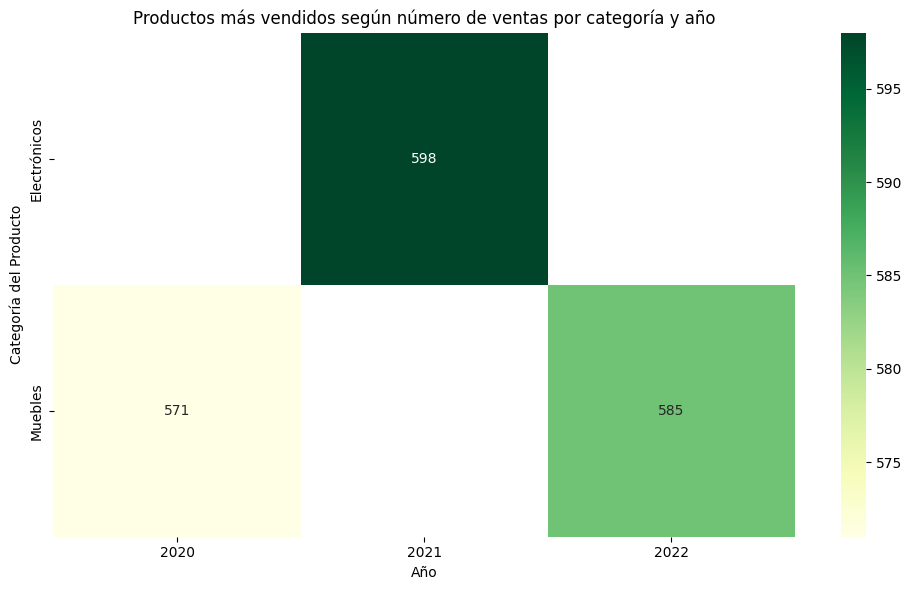

Productos menos vendidos
    Fecha de Compra   Categoría del Producto  Total_Ventas  Total_Valor_Ventas
4              2020   Instrumentos musicales           211          93448100.0
8              2021  Artículos para el hogar           211          17125400.0
22             2022                   Libros           212          10896800.0


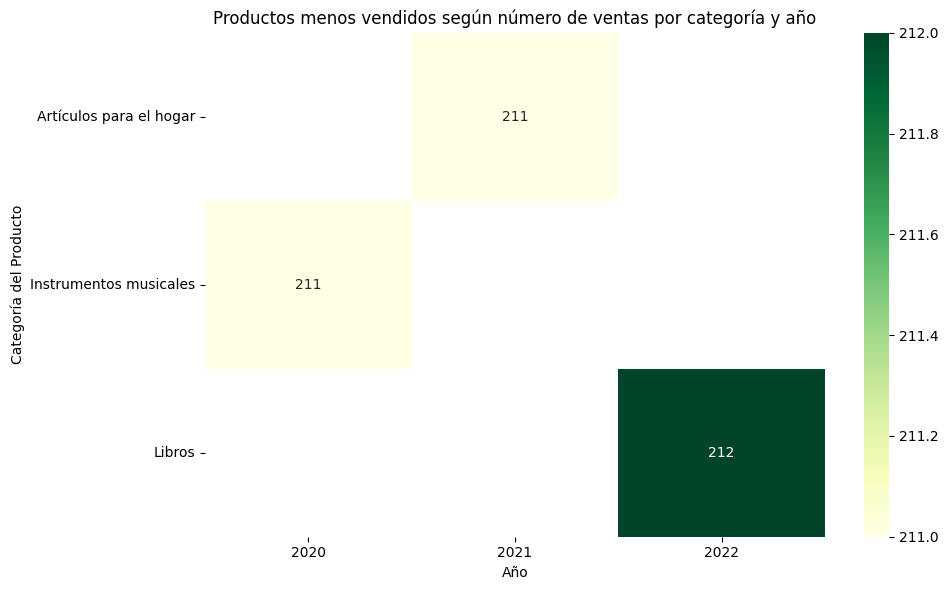

Productos más recaudo
    Fecha de Compra Categoría del Producto  Total_Ventas  Total_Valor_Ventas
3              2020           Electrónicos           517         496085000.0
11             2021           Electrónicos           598         559414800.0
19             2022           Electrónicos           518         486296300.0


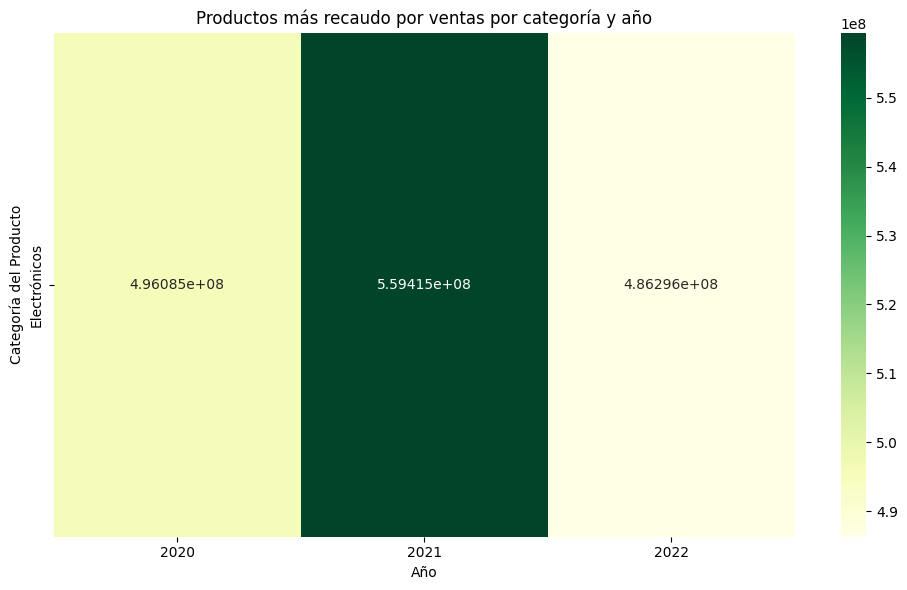

Productos menos recaudo
    Fecha de Compra Categoría del Producto  Total_Ventas  Total_Valor_Ventas
6              2020                 Libros           233          11647200.0
14             2021                 Libros           235          11808700.0
22             2022                 Libros           212          10896800.0


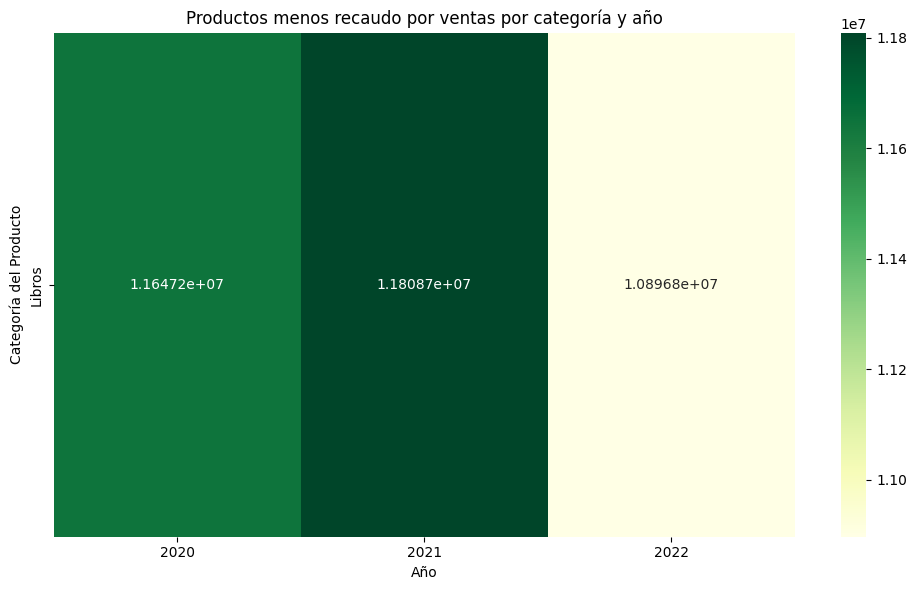

In [47]:
# print(ventas_por_año_categoria_tienda1)
# 1. Filtrar DataFrames (excluir 2023)
nombres_para_value_año = [ventas_por_año_categoria_tienda1, ventas_por_año_categoria_tienda2, ventas_por_año_categoria_tienda3, ventas_por_año_categoria_tienda4]
tiendas_filtradas_productos = { 'Tienda 1': 0, 'Tienda 2': 0, 'Tienda 3': 0, 'Tienda 4': 0}
for i, nombre in enumerate(tiendas_filtradas_productos.keys()):
    tiendas_filtradas_productos[nombre] = nombres_para_value_año[i][nombres_para_value_año[i]['Fecha de Compra'] != 2023]  # Solo años != 2023
df_tiendas_filtradas_productos = pd.concat([tiendas_filtradas_productos['Tienda 1'],tiendas_filtradas_productos['Tienda 2'],tiendas_filtradas_productos['Tienda 3'],tiendas_filtradas_productos['Tienda 4']])
# print('df_tiendas_filtradas_productos')
# print(df_tiendas_filtradas_productos)

df_tiendas_filtradas_productos_años = df_tiendas_filtradas_productos.groupby([df_tiendas_filtradas_productos['Fecha de Compra'], df_tiendas_filtradas_productos['Categoría del Producto']]).agg(
    Total_Ventas=('Total_Ventas', 'sum'),
    Total_Valor_Ventas=('Total_Valor_Ventas', 'sum')
).reset_index()
# print('df_tiendas_filtradas_productos_años')
# print(df_tiendas_filtradas_productos_años)

años = sorted(df_tiendas_filtradas_productos_años['Fecha de Compra'].unique())
max_value_año = {}
min_value_año = {}

for año in años:
  valor_año = df_tiendas_filtradas_productos_años[df_tiendas_filtradas_productos_años['Fecha de Compra'] == año]
  max_value_año[año] = valor_año[valor_año['Total_Ventas'] == max(valor_año['Total_Ventas'])]
  min_value_año[año] = valor_año[valor_año['Total_Ventas'] == min(valor_año['Total_Ventas'])]

df_max_value_año = pd.concat([max_value_año[2020], max_value_año[2021], max_value_año[2022]])
df_min_value_año = pd.concat([min_value_año[2020], min_value_año[2021], min_value_año[2022]])
print('Productos más vendidos')
print(df_max_value_año)


# Crear tabla dinámica para heatmap
heatmap_data_mas_vendidos_año = df_max_value_año.pivot_table(
    index='Categoría del Producto',
    columns='Fecha de Compra',
    values='Total_Ventas',
    aggfunc='sum'
)

# Crear heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_mas_vendidos_año, cmap="YlGn", annot=True, fmt='g')
plt.title("Productos más vendidos según número de ventas por categoría y año")
plt.ylabel("Categoría del Producto")
plt.xlabel("Año")
plt.tight_layout()
plt.show()

print('Productos menos vendidos')
print(df_min_value_año)
# Crear tabla dinámica para heatmap
heatmap_data_menos_vendidos_año = df_min_value_año.pivot_table(
    index='Categoría del Producto',
    columns='Fecha de Compra',
    values='Total_Ventas',
    aggfunc='sum'
)

# Crear heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_menos_vendidos_año, cmap="YlGn", annot=True, fmt='g')
plt.title("Productos menos vendidos según número de ventas por categoría y año")
plt.ylabel("Categoría del Producto")
plt.xlabel("Año")
plt.tight_layout()
plt.show()


# Por valor de ventas
max_value_año_valor = {}
min_value_año_valor = {}

for año in años:
  valor_año = df_tiendas_filtradas_productos_años[df_tiendas_filtradas_productos_años['Fecha de Compra'] == año]
  max_value_año_valor[año] = valor_año[valor_año['Total_Valor_Ventas'] == max(valor_año['Total_Valor_Ventas'])]
  min_value_año_valor[año] = valor_año[valor_año['Total_Valor_Ventas'] == min(valor_año['Total_Valor_Ventas'])]

df_max_value_año_valor = pd.concat([max_value_año_valor[2020], max_value_año_valor[2021], max_value_año_valor[2022]])
df_min_value_año_valor = pd.concat([min_value_año_valor[2020], min_value_año_valor[2021], min_value_año_valor[2022]])
print('Productos más recaudo')
print(df_max_value_año_valor)

# Crear tabla dinámica para heatmap
heatmap_data_mas_recaudo_año = df_max_value_año_valor.pivot_table(
    index='Categoría del Producto',
    columns='Fecha de Compra',
    values='Total_Valor_Ventas',
    aggfunc='sum'
)

# Crear heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_mas_recaudo_año, cmap="YlGn", annot=True, fmt='g')
plt.title("Productos más recaudo por ventas por categoría y año")
plt.ylabel("Categoría del Producto")
plt.xlabel("Año")
plt.tight_layout()
plt.show()

print('Productos menos recaudo')
print(df_min_value_año_valor)
# Crear tabla dinámica para heatmap
heatmap_data_menos_recaudo_año = df_min_value_año_valor.pivot_table(
    index='Categoría del Producto',
    columns='Fecha de Compra',
    values='Total_Valor_Ventas',
    aggfunc='sum'
)

# Crear heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_menos_recaudo_año, cmap="YlGn", annot=True, fmt='g')
plt.title("Productos menos recaudo por ventas por categoría y año")
plt.ylabel("Categoría del Producto")
plt.xlabel("Año")
plt.tight_layout()
plt.show()


            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      2021-01-16      Pedro Gomez          Bogotá             4   
1      2022-05-18  Beatriz Morales        Medellín             1   
2      2021-03-15   Juan Fernandez       Cartagena             1   
3      2022-05-03   Juan Fernandez            Cali             4   
4      2020-11-07    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon  Tienda   Año  
0  Tarjeta de crédito                   8   4.60971 -74.08175       1  202

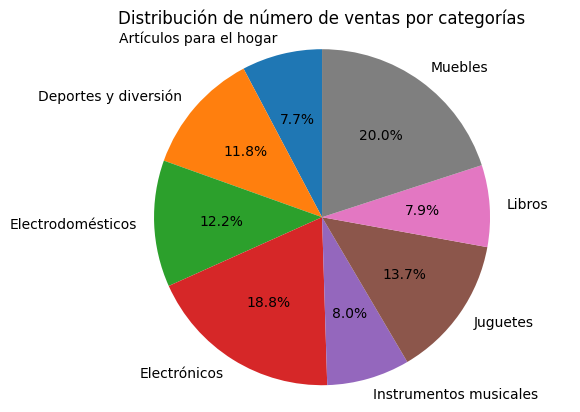

In [48]:
tienda1['Tienda'] = 1
tienda2['Tienda'] = 2
tienda3['Tienda'] = 3
tienda4['Tienda'] = 4
todas_tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4])
print(todas_tiendas.head())

grupo_categorias = todas_tiendas.groupby(todas_tiendas['Categoría del Producto']).agg(
    Total_Ventas=('Precio', 'count'),
    Total_Valor_Ventas=('Precio', 'sum')
).reset_index()
print(grupo_categorias)

plt.pie(grupo_categorias['Total_Ventas'], labels=grupo_categorias['Categoría del Producto'], autopct='%1.1f%%', startangle=90)

# Ajustar el gráfico para que sea circular
plt.axis('equal')

# Título
plt.title('Distribución de número de ventas por categorías')

# Mostrar el gráfico
plt.show()


# 4. Productos más y menos vendidos

In [49]:
# print(todas_tiendas.head())
grupo_productos = todas_tiendas.groupby(todas_tiendas['Producto']).agg(
    Total_Ventas=('Precio', 'count'),
    Total_Valor_Ventas=('Precio', 'sum')
).reset_index()
# print(grupo_productos)
max_producto = grupo_productos[grupo_productos['Total_Ventas'] == max(grupo_productos['Total_Ventas'])]
min_producto = grupo_productos[grupo_productos['Total_Ventas'] == min(grupo_productos['Total_Ventas'])]
print('Producto con el mayor número de ventas')
print(max_producto)
print('Producto con el menor número de ventas')
print(min_producto)

max_producto_valor = grupo_productos[grupo_productos['Total_Valor_Ventas'] == max(grupo_productos['Total_Valor_Ventas'])]
min_producto_valor = grupo_productos[grupo_productos['Total_Valor_Ventas'] == min(grupo_productos['Total_Valor_Ventas'])]
print('Producto con el mayor valor de recaudo en ventas')
print(max_producto_valor)
print('Producto con el menor valor de recaudo en ventas')
print(min_producto_valor)


Producto con el mayor número de ventas
         Producto  Total_Ventas  Total_Valor_Ventas
32  Mesa de noche           210          58419500.0
Producto con el menor número de ventas
        Producto  Total_Ventas  Total_Valor_Ventas
13  Celular ABXY           157         157911100.0
Producto con el mayor valor de recaudo en ventas
         Producto  Total_Ventas  Total_Valor_Ventas
48  TV LED UHD 4K           187         432489600.0
Producto con el menor valor de recaudo en ventas
           Producto  Total_Ventas  Total_Valor_Ventas
16  Cubo mágico 8x8           180           2729300.0


tiendas_productos_filtradas
              Producto   Año  Total_Ventas  Total_Valor_Ventas
0    Ajedrez de madera  2020            47           1360100.0
1    Ajedrez de madera  2021            60           1691900.0
2    Ajedrez de madera  2022            60           1710200.0
3              Armario  2020            63          30984000.0
4              Armario  2021            63          30569200.0
..                 ...   ...           ...                 ...
148        Tablet ABXY  2021            59          69884200.0
149        Tablet ABXY  2022            46          57357300.0
150       Vaso térmico  2020            49           2124600.0
151       Vaso térmico  2021            59           2618600.0
152       Vaso térmico  2022            60           2905400.0

[153 rows x 4 columns]
Productos más ventas
                     Producto   Año  Total_Ventas  Total_Valor_Ventas
36  Carrito de control remoto  2020            73           5261500.0
76                  Iphone 15  

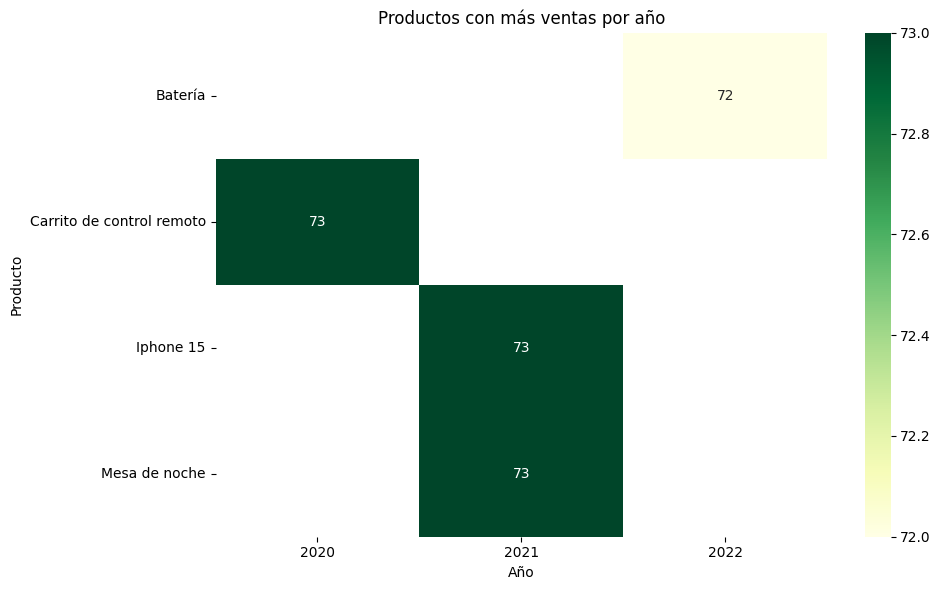

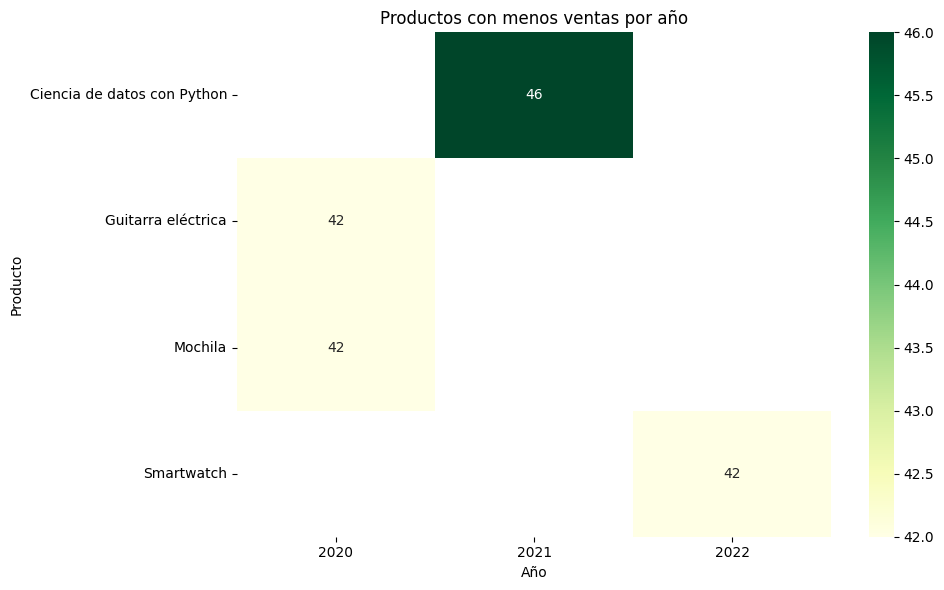

Productos más recaudo
          Producto   Año  Total_Ventas  Total_Valor_Ventas
144  TV LED UHD 4K  2020            58         133432900.0
145  TV LED UHD 4K  2021            69         154676900.0
146  TV LED UHD 4K  2022            50         122203400.0


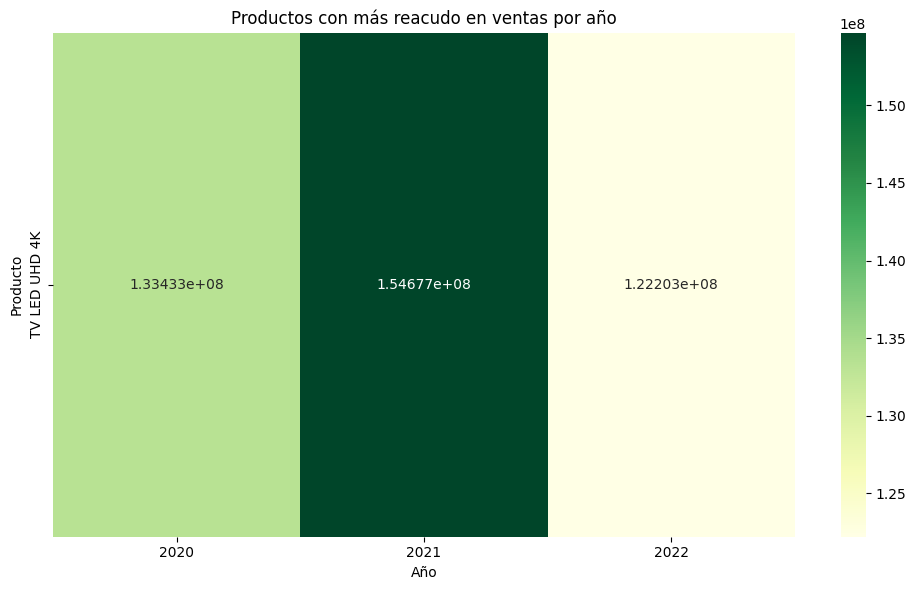

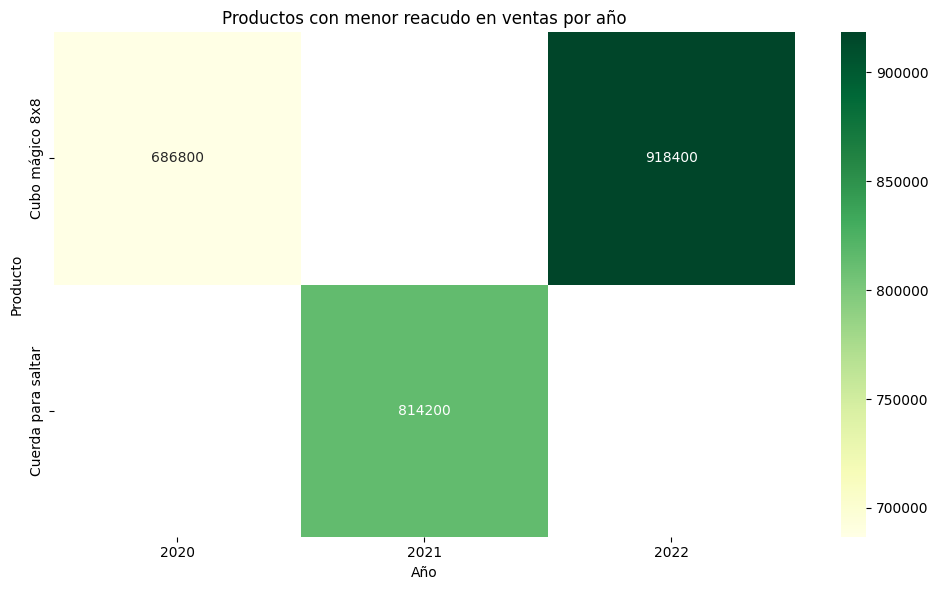

In [50]:
# Por año
# print(todas_tiendas.head())
# 1. Filtrar DataFrames (excluir 2023)
tiendas_productos_filtradas = todas_tiendas[todas_tiendas['Fecha de Compra'].dt.year != 2023]
print('tiendas_productos_filtradas')
# print(tiendas_productos_filtradas)

grupo_productos_año = tiendas_productos_filtradas.groupby([tiendas_productos_filtradas['Producto'], tiendas_productos_filtradas['Año']]).agg(
    Total_Ventas=('Precio', 'count'),
    Total_Valor_Ventas=('Precio', 'sum')
).reset_index()
print(grupo_productos_año)

# Por año y número de ventas
años = sorted(grupo_productos_año['Año'].unique())
max_producto_año_ventas = {}
min_producto_año_ventas = {}
# print('años')
# print(años)

for año in años:
  valor_año = grupo_productos_año[grupo_productos_año['Año'] == año]
  max_producto_año_ventas[año] = valor_año[valor_año['Total_Ventas'] == max(valor_año['Total_Ventas'])]
  min_producto_año_ventas[año] = valor_año[valor_año['Total_Ventas'] == min(valor_año['Total_Ventas'])]
# print(max_producto_año_ventas)
# print(min_producto_año_ventas)

df_max_producto_año_ventas = pd.concat([max_producto_año_ventas[2020], max_producto_año_ventas[2021], max_producto_año_ventas[2022]])
df_min_producto_año_ventas = pd.concat([min_producto_año_ventas[2020], min_producto_año_ventas[2021], min_producto_año_ventas[2022]])
print('Productos más ventas')
print(df_max_producto_año_ventas)

# Gráfico producto con más ventas
# Crear tabla dinámica para heatmap
heatmap_data_producto_mas_ventas_año = df_max_producto_año_ventas.pivot_table(
    index='Producto',
    columns='Año',
    values='Total_Ventas',
    aggfunc='sum'
)

# Crear heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_producto_mas_ventas_año, cmap="YlGn", annot=True, fmt='g')
plt.title("Productos con más ventas por año")
plt.ylabel("Producto")
plt.xlabel("Año")
plt.tight_layout()
plt.show()

# Gráfico producto con menos ventas
# Crear tabla dinámica para heatmap
heatmap_data_producto_menos_ventas_año = df_min_producto_año_ventas.pivot_table(
    index='Producto',
    columns='Año',
    values='Total_Ventas',
    aggfunc='sum'
)

# Crear heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_producto_menos_ventas_año, cmap="YlGn", annot=True, fmt='g')
plt.title("Productos con menos ventas por año")
plt.ylabel("Producto")
plt.xlabel("Año")
plt.tight_layout()
plt.show()

# Por año y recaudo de ventas
años = sorted(grupo_productos_año['Año'].unique())
max_producto_año_recaudo = {}
min_producto_año_recaudo = {}
# print('años')
# print(años)

for año in años:
  valor_año = grupo_productos_año[grupo_productos_año['Año'] == año]
  max_producto_año_recaudo[año] = valor_año[valor_año['Total_Valor_Ventas'] == max(valor_año['Total_Valor_Ventas'])]
  min_producto_año_recaudo[año] = valor_año[valor_año['Total_Valor_Ventas'] == min(valor_año['Total_Valor_Ventas'])]
# print(max_producto_año_ventas)
# print(min_producto_año_ventas)

df_max_producto_año_recaudo = pd.concat([max_producto_año_recaudo[2020], max_producto_año_recaudo[2021], max_producto_año_recaudo[2022]])
df_min_producto_año_recaudo = pd.concat([min_producto_año_recaudo[2020], min_producto_año_recaudo[2021], min_producto_año_recaudo[2022]])
print('Productos más recaudo')
print(df_max_producto_año_recaudo)

# Para mayor recaudo de ventas
# Crear tabla dinámica para heatmap
heatmap_data_producto_mas_recaudo_año = df_max_producto_año_recaudo.pivot_table(
    index='Producto',
    columns='Año',
    values='Total_Valor_Ventas',
    aggfunc='sum'
)

# Crear heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_producto_mas_recaudo_año, cmap="YlGn", annot=True, fmt='g')
plt.title("Productos con más reacudo en ventas por año")
plt.ylabel("Producto")
plt.xlabel("Año")
plt.tight_layout()
plt.show()

# Para menor recaudo de ventas
# Crear tabla dinámica para heatmap
heatmap_data_producto_menos_recaudo_año = df_min_producto_año_recaudo.pivot_table(
    index='Producto',
    columns='Año',
    values='Total_Valor_Ventas',
    aggfunc='sum'
)

# Crear heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_producto_menos_recaudo_año, cmap="YlGn", annot=True, fmt='g')
plt.title("Productos con menor reacudo en ventas por año")
plt.ylabel("Producto")
plt.xlabel("Año")
plt.tight_layout()
plt.show()

tiendas_productos_filtradas
              Producto  Tienda  Total_Ventas  Total_Valor_Ventas
0    Ajedrez de madera       1            42           1210500.0
1    Ajedrez de madera       2            42           1205100.0
2    Ajedrez de madera       3            46           1328400.0
3    Ajedrez de madera       4            37           1018200.0
4              Armario       1            51          24976000.0
..                 ...     ...           ...                 ...
199        Tablet ABXY       4            42          51989600.0
200       Vaso térmico       1            48           2260500.0
201       Vaso térmico       2            42           1919600.0
202       Vaso térmico       3            34           1503600.0
203       Vaso térmico       4            44           1964900.0

[204 rows x 4 columns]
Productos más ventas
                      Producto  Tienda  Total_Ventas  Total_Valor_Ventas
132                 Microondas       1            58          33732200.0
9

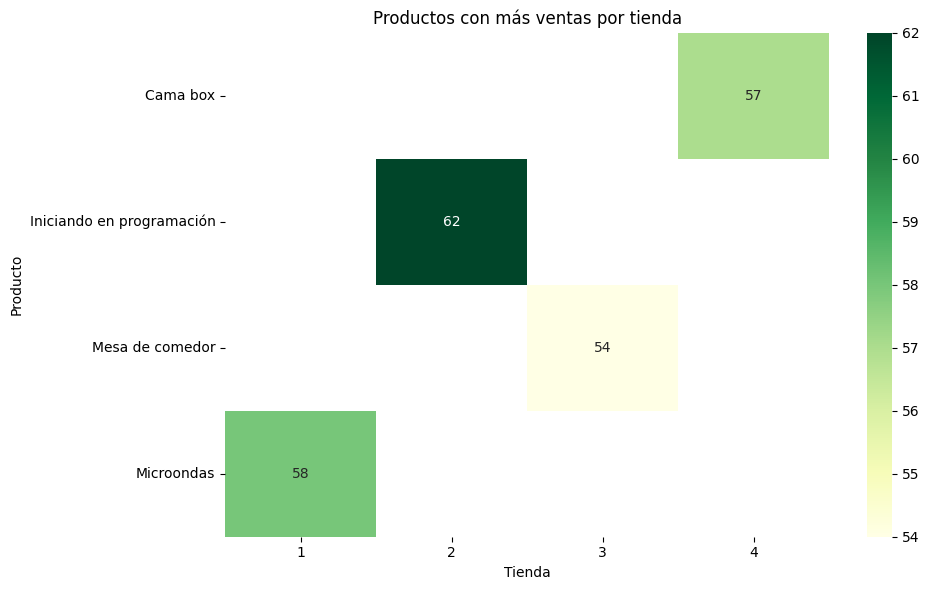

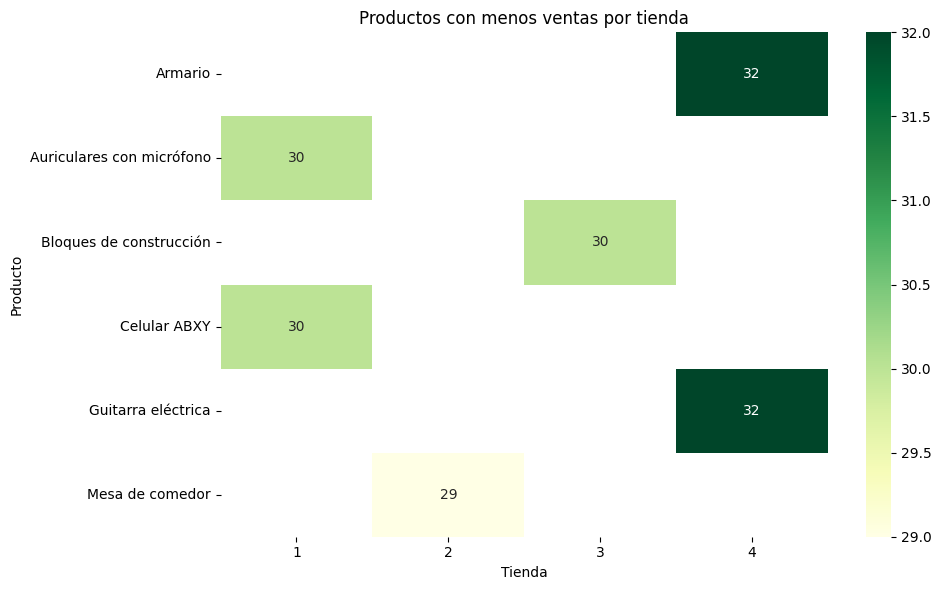

Productos más recaudo
          Producto  Tienda  Total_Ventas  Total_Valor_Ventas
192  TV LED UHD 4K       1            53         125559800.0
101      Iphone 15       2            49         101628900.0
194  TV LED UHD 4K       3            42          96669100.0
103      Iphone 15       4            47          94965100.0


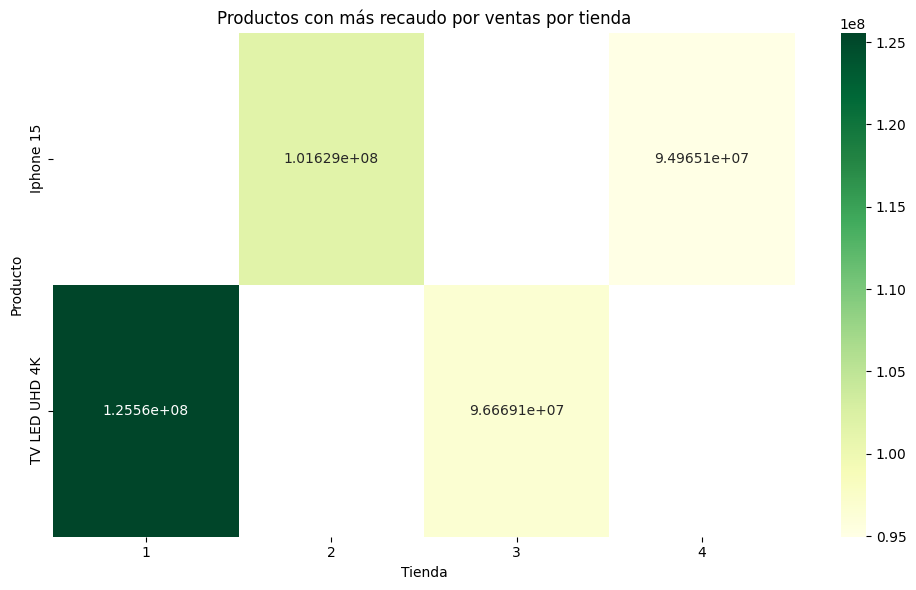

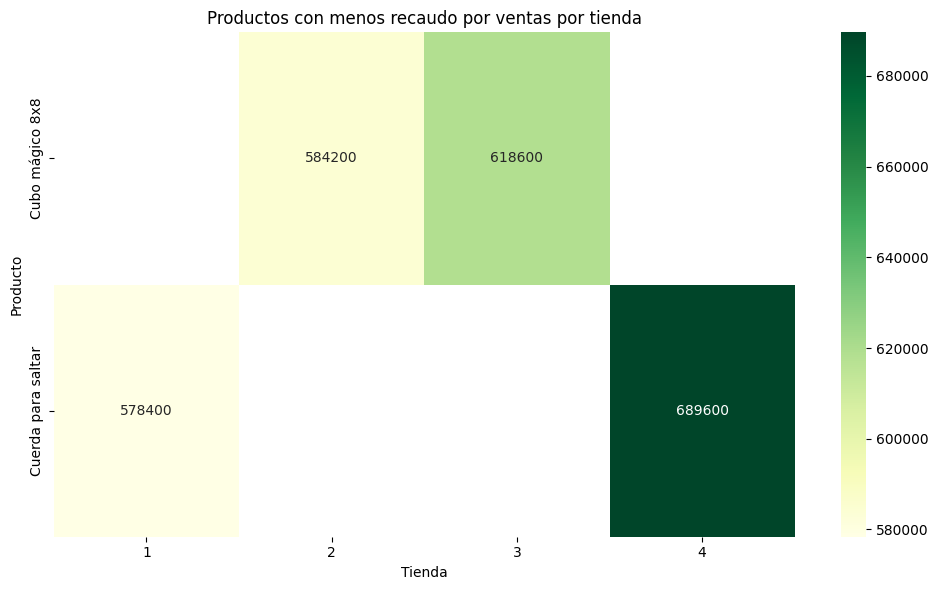

In [51]:
# Por tienda
# print(todas_tiendas.head())
# 1. Filtrar DataFrames (excluir 2023)
tiendas_productos_filtradas = todas_tiendas[todas_tiendas['Fecha de Compra'].dt.year != 2023]
print('tiendas_productos_filtradas')
# print(tiendas_productos_filtradas)

grupo_productos_tiendas = tiendas_productos_filtradas.groupby([tiendas_productos_filtradas['Producto'], tiendas_productos_filtradas['Tienda']]).agg(
    Total_Ventas=('Precio', 'count'),
    Total_Valor_Ventas=('Precio', 'sum')
).reset_index()
print(grupo_productos_tiendas)

# Por tienda y número de ventas
tiendas = sorted(grupo_productos_tiendas['Tienda'].unique())
max_producto_tienda_ventas = {}
min_producto_tienda_ventas = {}
# print('años')
# print(años)

for tienda in tiendas:
  valor_tienda = grupo_productos_tiendas[grupo_productos_tiendas['Tienda'] == tienda]
  max_producto_tienda_ventas[tienda] = valor_tienda[valor_tienda['Total_Ventas'] == max(valor_tienda['Total_Ventas'])]
  min_producto_tienda_ventas[tienda] = valor_tienda[valor_tienda['Total_Ventas'] == min(valor_tienda['Total_Ventas'])]
# print(max_producto_tienda_ventas)
# print(min_producto_tienda_ventas)

df_max_producto_tienda_ventas = pd.concat([max_producto_tienda_ventas[1], max_producto_tienda_ventas[2], max_producto_tienda_ventas[3], max_producto_tienda_ventas[4]])
df_min_producto_tienda_ventas = pd.concat([min_producto_tienda_ventas[1], min_producto_tienda_ventas[2], min_producto_tienda_ventas[3], min_producto_tienda_ventas[4]])
print('Productos más ventas')
print(df_max_producto_tienda_ventas)

# Gráfico producto con más ventas
# Crear tabla dinámica para heatmap
heatmap_data_producto_mas_ventas_tienda = df_max_producto_tienda_ventas.pivot_table(
    index='Producto',
    columns='Tienda',
    values='Total_Ventas',
    aggfunc='sum'
)

# Crear heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_producto_mas_ventas_tienda, cmap="YlGn", annot=True, fmt='g')
plt.title("Productos con más ventas por tienda")
plt.ylabel("Producto")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()

# Gráfico producto con menos ventas
# Crear tabla dinámica para heatmap
heatmap_data_producto_menos_ventas_tienda = df_min_producto_tienda_ventas.pivot_table(
    index='Producto',
    columns='Tienda',
    values='Total_Ventas',
    aggfunc='sum'
)

# Crear heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_producto_menos_ventas_tienda, cmap="YlGn", annot=True, fmt='g')
plt.title("Productos con menos ventas por tienda")
plt.ylabel("Producto")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()

# Por año y recaudo de ventas
tiendas = sorted(grupo_productos_tiendas['Tienda'].unique())
max_producto_tienda_recaudo = {}
min_producto_tienda_recaudo = {}
# print('años')
# print(años)

for tienda in tiendas:
  valor_tienda = grupo_productos_tiendas[grupo_productos_tiendas['Tienda'] == tienda]
  max_producto_tienda_recaudo[tienda] = valor_tienda[valor_tienda['Total_Valor_Ventas'] == max(valor_tienda['Total_Valor_Ventas'])]
  min_producto_tienda_recaudo[tienda] = valor_tienda[valor_tienda['Total_Valor_Ventas'] == min(valor_tienda['Total_Valor_Ventas'])]
# print(max_producto_tienda_recaudo)
# print(min_producto_tienda_recaudo)

df_max_producto_tienda_recaudo = pd.concat([max_producto_tienda_recaudo[1], max_producto_tienda_recaudo[2], max_producto_tienda_recaudo[3], max_producto_tienda_recaudo[4]])
df_min_producto_tienda_recaudo = pd.concat([min_producto_tienda_recaudo[1], min_producto_tienda_recaudo[2], min_producto_tienda_recaudo[3], min_producto_tienda_recaudo[4]])
print('Productos más recaudo')
print(df_max_producto_tienda_recaudo)

# Gráfico producto con más recaudo
# Crear tabla dinámica para heatmap
heatmap_data_producto_mas_recaudo_tienda = df_max_producto_tienda_recaudo.pivot_table(
    index='Producto',
    columns='Tienda',
    values='Total_Valor_Ventas',
    aggfunc='sum'
)

# Crear heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_producto_mas_recaudo_tienda, cmap="YlGn", annot=True, fmt='g')
plt.title("Productos con más recaudo por ventas por tienda")
plt.ylabel("Producto")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()

# Gráfico producto con menos recaudo
# Crear tabla dinámica para heatmap
heatmap_data_producto_menos_recaudo_tienda = df_min_producto_tienda_recaudo.pivot_table(
    index='Producto',
    columns='Tienda',
    values='Total_Valor_Ventas',
    aggfunc='sum'
)

# Crear heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_producto_menos_recaudo_tienda, cmap="YlGn", annot=True, fmt='g')
plt.title("Productos con menos recaudo por ventas por tienda")
plt.ylabel("Producto")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

grupo_envios_tienda
   Tienda  promedio_costo_envio  Promedio_Valor_Ventas
0       1          26018.609580          487867.910131
1       2          25216.235693          473227.426876
2       3          24805.680373          465459.771089
3       4          23459.457167          440362.892282


<ipython-input-52-1bb5a52206d3>:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()  # Muestra leyenda con años diferenciados


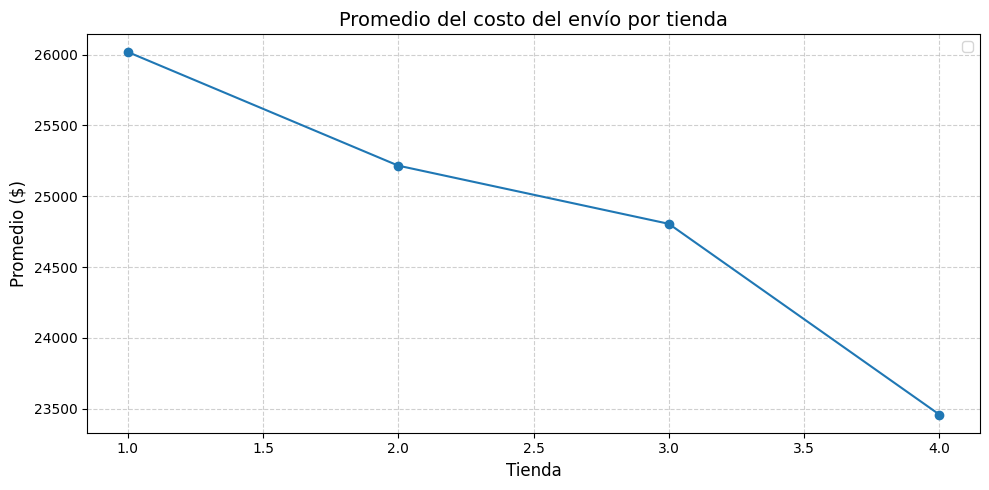

In [52]:
# print(todas_tiendas.head())
promedio_envios = round(todas_tiendas['Costo de envío'].mean(), 1)
# print('promedio_envios')
# print(promedio_envios)

# Agrupar
grupo_envios_tienda = todas_tiendas.groupby(todas_tiendas['Tienda']).agg(
    promedio_costo_envio = ('Costo de envío', 'mean'),
    Promedio_Valor_Ventas = ('Precio', 'mean')
).reset_index()
print('grupo_envios_tienda')
print(grupo_envios_tienda)

# Gráfico costo promedio del envío por tienda
plt.figure(figsize=(10, 5))  # Tamaño del gráfico
plt.plot(grupo_envios_tienda['Tienda'], grupo_envios_tienda['promedio_costo_envio'], marker="o", linestyle="-")
# Personalización
plt.title("Promedio del costo del envío por tienda", fontsize=14)
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Promedio ($)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()  # Muestra leyenda con años diferenciados

# Rotar etiquetas si es necesario
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      2021-01-16      Pedro Gomez          Bogotá             4   
1      2022-05-18  Beatriz Morales        Medellín             1   
2      2021-03-15   Juan Fernandez       Cartagena             1   
3      2022-05-03   Juan Fernandez            Cali             4   
4      2020-11-07    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon  Tienda   Año  
0  Tarjeta de crédito                   8   4.60971 -74.08175       1  202

<ipython-input-53-fa5fdd410ee4>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()  # Muestra leyenda con años diferenciados



grupo_envios_año
    Año  promedio_costo_envio
0  2020          24994.826984
1  2021          25426.291080
2  2022          24657.744518
3  2023          22981.780250


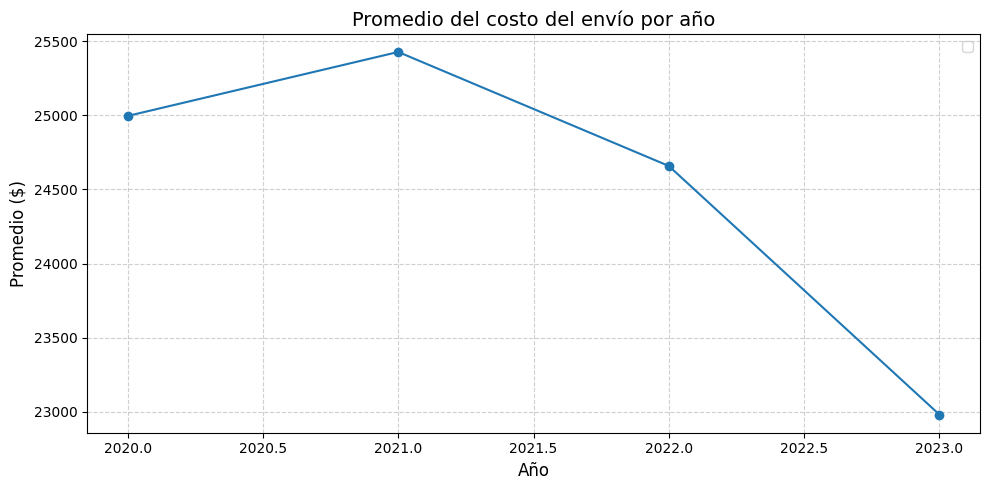

In [53]:
print(todas_tiendas.head())
# promedio_envios = round(todas_tiendas['Costo de envío'].mean(), 1)
# print('promedio_envios')
# print(promedio_envios)

# Agrupar por año
grupo_envios_año = todas_tiendas.groupby(todas_tiendas['Año']).agg(
    promedio_costo_envio = ('Costo de envío', 'mean')
).reset_index()
print('grupo_envios_año')
print(grupo_envios_año)

# Gráfico costo promedio del envío por año
plt.figure(figsize=(10, 5))  # Tamaño del gráfico
plt.plot(grupo_envios_año['Año'], grupo_envios_año['promedio_costo_envio'], marker="o", linestyle="-")
# Personalización
plt.title("Promedio del costo del envío por año", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Promedio ($)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()  # Muestra leyenda con años diferenciados

# Rotar etiquetas si es necesario
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


grupo_envios_año_tienda_filtrados
    Tienda   Año  promedio_costo_envio
0        1  2020          27617.062937
1        1  2021          26007.713126
2        1  2022          23649.789621
4        2  2020          24525.000000
5        2  2021          24530.303030
6        2  2022          26969.915254
8        3  2020          24347.931526
9        3  2021          26195.675676
10       3  2022          25308.513514
12       4  2020          23528.322148
13       4  2021          24997.580645
14       4  2022          22691.573034


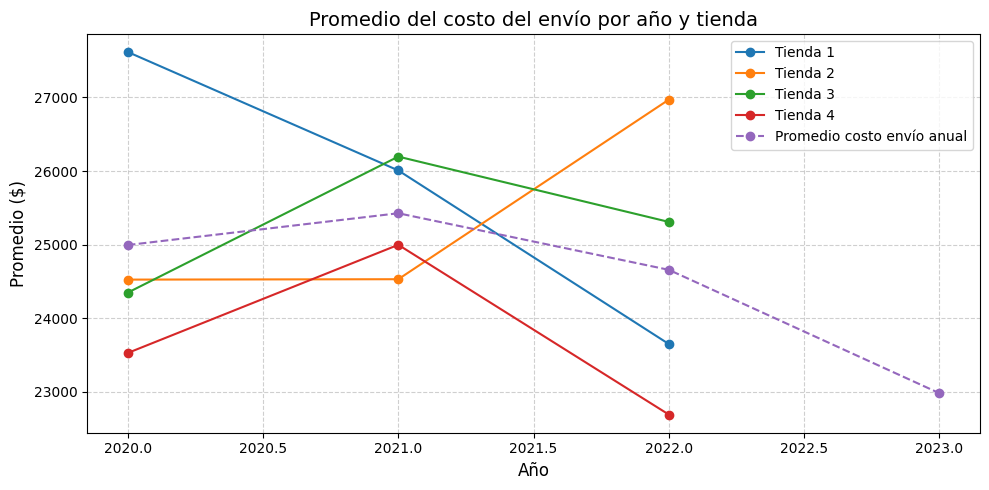

In [118]:
# print([todas_tiendas.head())
# promedio_envios = round(todas_tiendas['Costo de envío'].mean(), 1)
# print('promedio_envios')
# print(promedio_envios)

# Agrupar por año
grupo_envios_año_tienda = todas_tiendas.groupby([todas_tiendas['Tienda'], todas_tiendas['Año']]).agg(
    promedio_costo_envio = ('Costo de envío', 'mean')
).reset_index()
# print('grupo_envios_año_tienda')
# print(grupo_envios_año_tienda)
grupo_envios_año_tienda_filtrados = grupo_envios_año_tienda[grupo_envios_año_tienda['Año'] != 2023]
print('grupo_envios_año_tienda_filtrados')
print(grupo_envios_año_tienda_filtrados)

# Gráfico costo promedio del envío por año
plt.figure(figsize=(10, 5))  # Tamaño del gráfico
for tienda in grupo_envios_año_tienda['Tienda'].unique():
  datos_tienda = grupo_envios_año_tienda_filtrados[grupo_envios_año_tienda_filtrados['Tienda'] == tienda]
  plt.plot(datos_tienda['Año'], datos_tienda['promedio_costo_envio'], marker="o", linestyle="-", label=f'Tienda {tienda}')
plt.plot(grupo_envios_año['Año'], grupo_envios_año['promedio_costo_envio'], marker="o", linestyle="--", label='Promedio costo envío anual')
# Personalización
plt.title("Promedio del costo del envío por año y tienda", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Promedio ($)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()  # Muestra leyenda con años diferenciados

# Rotar etiquetas si es necesario
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [125]:
print(todas_tiendas['Precio'].max())
print(tienda1['Precio'].sum())
print(tienda2['Precio'].sum())
print(tienda3['Precio'].sum())
print(tienda4['Precio'].sum())
print(todas_tiendas['Costo de envío'].sum())
print(tienda1['Costo de envío'].sum())
print(tienda3['Costo de envío'].sum())
print(tienda4['Costo de envío'].sum())
print(tienda4['Costo de envío'].sum())
print(f"%1 = {round(((tienda1['Costo de envío'].sum())/(tienda1['Precio'].sum()))*100, 4)}")
print(f"%2 = {round(((tienda2['Costo de envío'].sum())/(tienda2['Precio'].sum()))*100, 4)}")
print(f"%3 = {round(((tienda3['Costo de envío'].sum())/(tienda3['Precio'].sum()))*100, 4)}")
print(f"%4 = {round(((tienda4['Costo de envío'].sum())/(tienda4['Precio'].sum()))*100, 4)}")



2977000.0
1150880400.0
1116343500.0
1098019600.0
1038375700.0
234697000.0
61377900.0
58516600.0
55317400.0
55317400.0
%1 = 5.3331
%2 = 5.3286
%3 = 5.3293
%4 = 5.3273


#RELATORIO

El archivo con el informe de análisis se encuentra en el repositorio bajo el nombre Informe_AluraStore.pdf